# Загрузка и объединение данных

нужен api ключ из кагла, загрузите его в рантайм, дальше все работает само. train табличка 4.5 гб, это лучший способ

Выкачка и распаковка занимает около минуты

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle competitions download -c favorita-grocery-sales-forecasting

 98% 449M/458M [00:01<00:00, 369MB/s]
100% 458M/458M [00:01<00:00, 410MB/s]


In [ ]:
!7z x favorita-grocery-sales-forecasting.zip


7-Zip [64] 16.02 : Copyright (c) 1999-2016 Igor Pavlov : 2016-05-21
p7zip Version 16.02 (locale=en_US.UTF-8,Utf16=on,HugeFiles=on,64 bits,2 CPUs Intel(R) Xeon(R) CPU @ 2.20GHz (406F0),ASM,AES-NI)

Scanning the drive for archives:
  0M Scan         1 file, 480014675 bytes (458 MiB)

Extracting archive: favorita-grocery-sales-forecasting.zip
--
Path = favorita-grocery-sales-forecasting.zip
Type = zip
Physical Size = 480014675

  0%      2% 6 - train.csv.7z                       6% 6 - train.csv.7z                       8% 6 - train.csv.7z                      14% 6 - train.csv.7z                      20% 6 - train.csv.7z                      26% 6 - train.csv.7z                      29% 6 - train.csv.7z

In [ ]:
!7z x train.csv.7z


7-Zip [64] 16.02 : Copyright (c) 1999-2016 Igor Pavlov : 2016-05-21
p7zip Version 16.02 (locale=en_US.UTF-8,Utf16=on,HugeFiles=on,64 bits,2 CPUs Intel(R) Xeon(R) CPU @ 2.20GHz (406F0),ASM,AES-NI)

Scanning the drive for archives:
  0M Scan         1 file, 474092593 bytes (453 MiB)

Extracting archive: train.csv.7z
--
Path = train.csv.7z
Type = 7z
Physical Size = 474092593
Headers Size = 122
Method = LZMA2:24
Solid = -
Blocks = 1

  0%      0% - train.csv                  1% - train.csv                  2% - train.csv                  3% - train.csv                  4% - train.csv                  5% - train.csv                  6% - train.csv                  7% - train.csv                  8% - train.csv

In [ ]:
!7z x transactions.csv.7z
!7z x test.csv.7z
!7z x stores.csv.7z
!7z x oil.csv.7z
!7z x items.csv.7z
!7z x holidays_events.csv.7z
!rm -f *.zip *.7z


7-Zip [64] 16.02 : Copyright (c) 1999-2016 Igor Pavlov : 2016-05-21
p7zip Version 16.02 (locale=en_US.UTF-8,Utf16=on,HugeFiles=on,64 bits,2 CPUs Intel(R) Xeon(R) CPU @ 2.20GHz (406F0),ASM,AES-NI)

Scanning the drive for archives:
  0M Scan         1 file, 219499 bytes (215 KiB)

Extracting archive: transactions.csv.7z
--
Path = transactions.csv.7z
Type = 7z
Physical Size = 219499
Headers Size = 138
Method = LZMA2:1536k
Solid = -
Blocks = 1

  0%    Everything is Ok

Size:       1552637
Compressed: 219499

7-Zip [64] 16.02 : Copyright (c) 1999-2016 Igor Pavlov : 2016-05-21
p7zip Version 16.02 (locale=en_US.UTF-8,Utf16=on,HugeFiles=on,64 bits,2 CPUs Intel(R) Xeon(R) CPU @ 2.20GHz (406F0),ASM,AES-NI)

Scanning the drive for archives:
  0M Scan         1 file, 4885065 bytes (4771 KiB)

Extracting archive: test.csv.7z
--
Path = test.csv.7z
Type = 7z
Physical Size = 4885065
Headers Size = 122
Method = LZMA2:24
Solid = -
Blocks = 1

  0%    

#Проведение EDA

## Первичный анализ типов данных и заполнение пропусков

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Датасет очень большой, весь загрузить не получится, начальный анализ проведем на первых пяти миллионах строк - достаточно много

In [ ]:
df = pd.read_csv("train.csv", nrows=5_000_000)

In [ ]:
df.shape

(5000000, 6)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000000 entries, 0 to 4999999
Data columns (total 6 columns):
 #   Column       Dtype  
---  ------       -----  
 0   id           int64  
 1   date         object 
 2   store_nbr    int64  
 3   item_nbr     int64  
 4   unit_sales   float64
 5   onpromotion  float64
dtypes: float64(2), int64(3), object(1)
memory usage: 228.9+ MB


In [ ]:
df.head(10)

,id,date,store_nbr,item_nbr,unit_sales,onpromotion
0,0,2013-01-01,25,103665,7.0,NaN
1,1,2013-01-01,25,105574,1.0,NaN
2,2,2013-01-01,25,105575,2.0,NaN
3,3,2013-01-01,25,108079,1.0,NaN
4,4,2013-01-01,25,108701,1.0,NaN
5,5,2013-01-01,25,108786,3.0,NaN
6,6,2013-01-01,25,108797,1.0,NaN
7,7,2013-01-01,25,108952,1.0,NaN
8,8,2013-01-01,25,111397,13.0,NaN
9,9,2013-01-01,25,114790,3.0,NaN


Подтягиваем данные из других таблиц

In [ ]:
stores = pd.read_csv("stores.csv")
oil = pd.read_csv("oil.csv")
items = pd.read_csv("items.csv")
holidays = pd.read_csv("holidays_events.csv")
transactions = pd.read_csv("transactions.csv")

df = df.merge(stores, on="store_nbr", how="left")

df = df.merge(oil, on="date", how="left")
df = df.merge(items, on="item_nbr", how="left")
df = df.merge(holidays, on="date", how="left")
df = df.merge(transactions, on=["date", "store_nbr"], how="left")

print(df.shape)
df.head()

(5000000, 20)


,id,date,store_nbr,item_nbr,unit_sales,onpromotion,city,state,type_x,cluster,dcoilwtico,family,class,perishable,type_y,locale,locale_name,description,transferred,transactions
0,0,2013-01-01,25,103665,7.0,NaN,Salinas,Santa Elena,D,1,NaN,BREAD/BAKERY,2712,1,Holiday,National,Ecuador,Primer dia del ano,False,770
1,1,2013-01-01,25,105574,1.0,NaN,Salinas,Santa Elena,D,1,NaN,GROCERY I,1045,0,Holiday,National,Ecuador,Primer dia del ano,False,770
2,2,2013-01-01,25,105575,2.0,NaN,Salinas,Santa Elena,D,1,NaN,GROCERY I,1045,0,Holiday,National,Ecuador,Primer dia del ano,False,770
3,3,2013-01-01,25,108079,1.0,NaN,Salinas,Santa Elena,D,1,NaN,GROCERY I,1030,0,Holiday,National,Ecuador,Primer dia del ano,False,770
4,4,2013-01-01,25,108701,1.0,NaN,Salinas,Santa Elena,D,1,NaN,DELI,2644,1,Holiday,National,Ecuador,Primer dia del ano,False,770


In [ ]:
df.describe(include=[np.number]).transpose()

,count,mean,std,min,25%,50%,75%,max
id,5000000.0,2.500000e+06,1.443376e+06,0.00,1249999.75,2499999.50,3749999.25,4999999.00
store_nbr,5000000.0,2.653732e+01,1.649656e+01,1.00,11.00,27.00,43.00,54.00
item_nbr,5000000.0,6.279487e+05,3.088148e+05,96995.00,358272.00,623316.00,886396.00,1149579.00
unit_sales,5000000.0,8.520708e+00,1.908651e+01,-207.00,2.00,4.00,9.00,9431.00
onpromotion,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cluster,5000000.0,8.744253e+00,4.754670e+00,1.00,4.00,9.00,13.00,17.00
dcoilwtico,3385071.0,9.366934e+01,2.556590e+00,86.65,92.46,93.36,95.84,97.98
class,5000000.0,1.906950e+03,1.048792e+03,1002.00,1044.00,1124.00,2718.00,7034.00
perishable,5000000.0,2.172266e-01,4.123581e-01,0.00,0.00,0.00,0.00,1.00
transactions,5000000.0,1.864507e+03,9.585340e+02,374.00,1161.00,1571.00,2437.00,5401.00


In [ ]:
df.describe(include=['object']).transpose()

,count,unique,top,freq
date,5000000,121,2013-03-02,45876
city,5000000,19,Quito,2182614
state,5000000,15,Pichincha,2293456
type_x,5000000,5,D,1936704
family,5000000,22,GROCERY I,2148790
type_y,447842,2,Holiday,363134
locale,447842,3,National,227155
locale_name,447842,6,Ecuador,227155
description,447842,11,Carnaval,78503
transferred,447842,1,False,447842


Датасет действительно очень большой, 5 миллионов строк - 120 охваченных целиком дней. Из всех этих строк ни одной c заполненной колонкой on_promotion, в источнике сказано, что таких строк примерно 16% из всех.

В таблицах stores.csv и transactions.csv нет пропусков, при этом есть цены нефти не за все дни (возможно, не проводились торги на бирже в этот день). Остальные пропуски идут из таблицы holidays_events.csv, что логично - значит, эти дни не были праздниками.

Примечание, что находится в столбце transferred - это перенос праздника с его официальной даты на другой день. Если праздник перенесли, то в столбце transferred будет true, и в дне, на который его переенесли, в столбце type_y будет transfer.

Больше всего в данных категориальных признаков, это нужно будет учитывать в будущем, когда мы будем подбирать модель для работы с данными

## Преобразование данных

In [ ]:
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d')

In [ ]:
binary_cols = ['transferred', 'perishable']

for col in binary_cols:
    df[col] = df[col].map({df[col].unique()[0]: False,
                           df[col].unique()[1]: True})

Преобразовали строку с датами в datetime, чтобы в будущем из них можно было извлечь больше данных. Также, преобразовали 2 категориальные колонки в bool, тк у них только по 2 возможных значения, и так будет эффективнее проводить дальнейший анализ


## Построение графиков

In [ ]:
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
cat_cols = df.select_dtypes(include=['object', 'category', 'datetime']).columns.tolist()

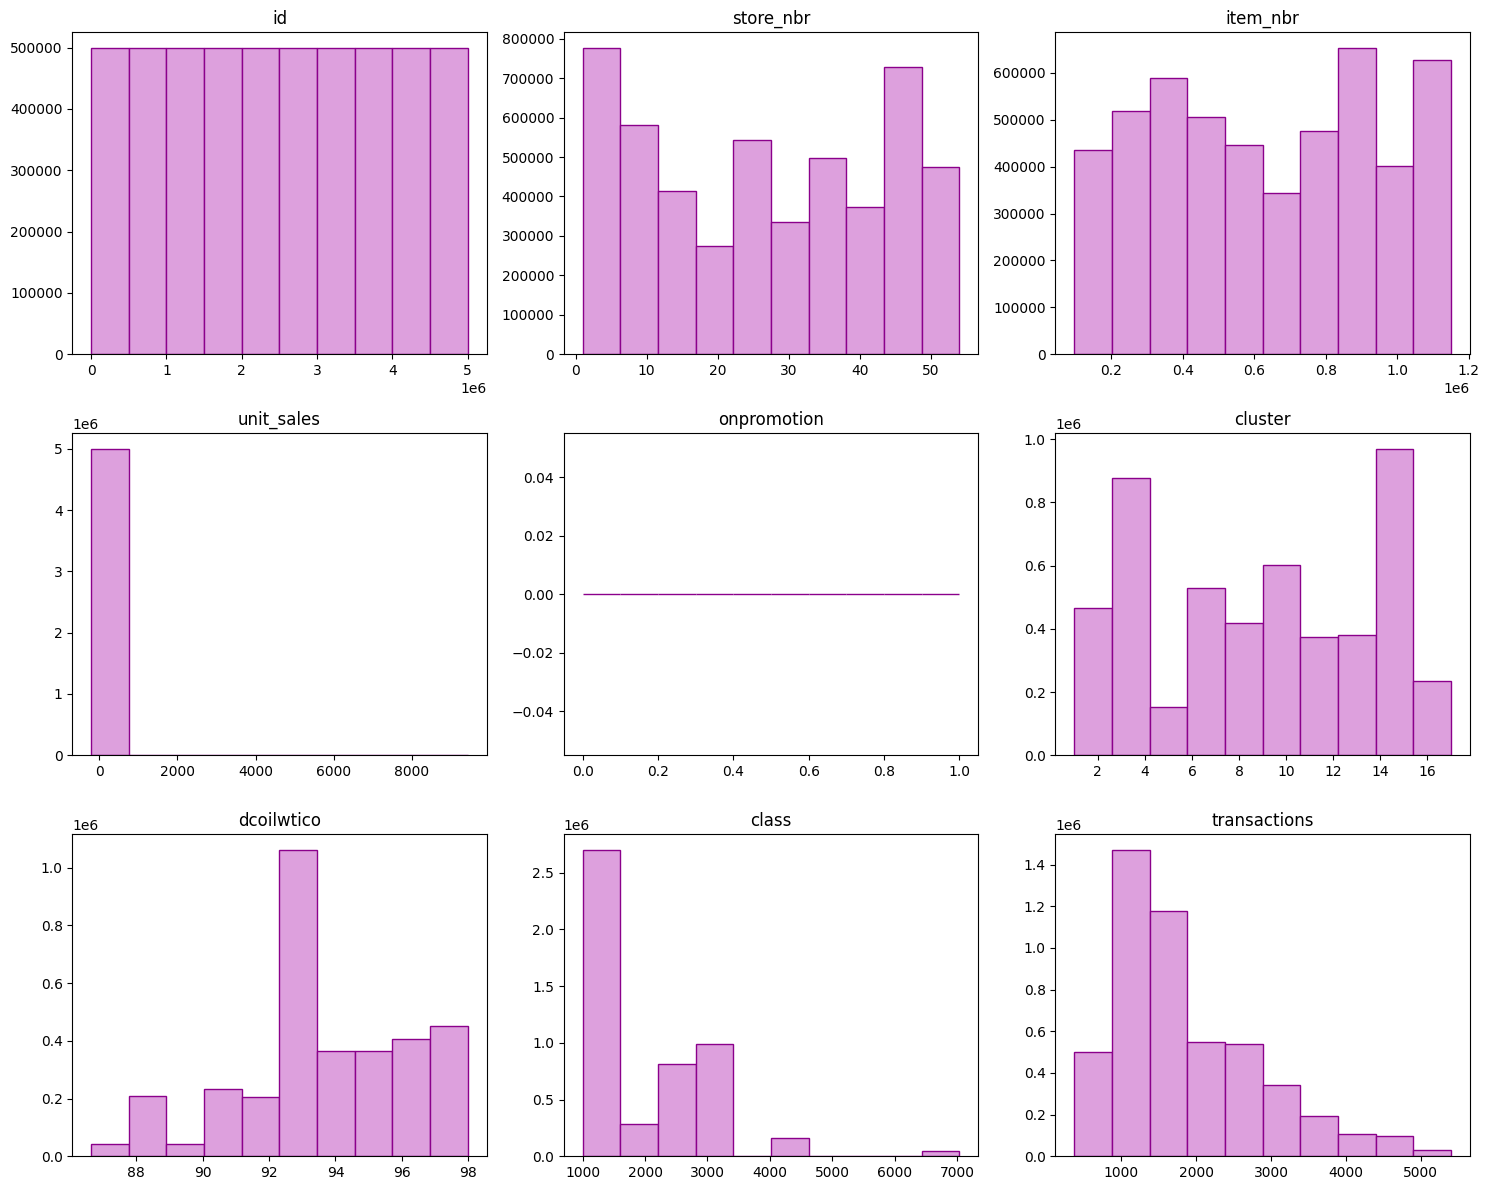

In [ ]:
fig, axes = plt.subplots(nrows=int(np.ceil(len(num_cols)/3)), ncols=3, figsize=(15, 4 * int(np.ceil(len(num_cols)/3))))
axes = axes.flatten()

for ax, col in zip(axes, num_cols):
    ax.hist(df[col].dropna(), color='plum', edgecolor='darkmagenta')
    ax.set_title(col)

for ax in axes[len(num_cols):]:
    ax.axis("off")

plt.tight_layout()
plt.show()

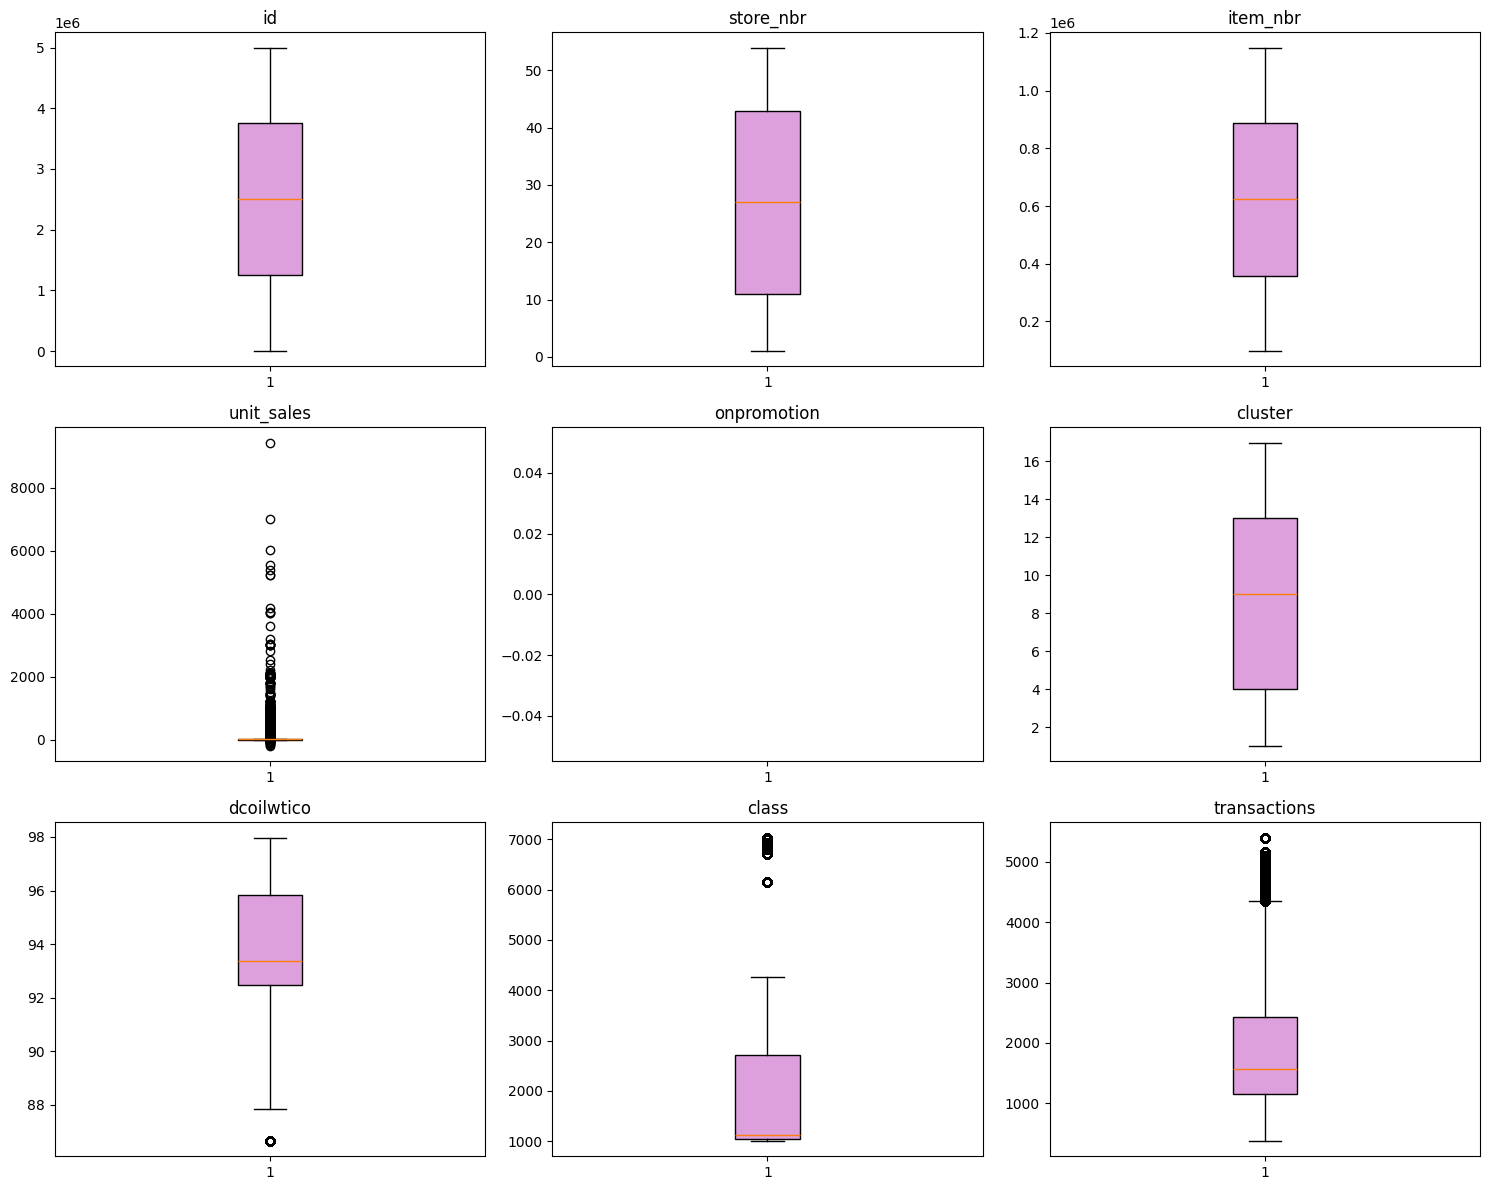

In [ ]:
fig, axes = plt.subplots(nrows=int(np.ceil(len(num_cols)/3)), ncols=3, figsize=(15, 4 * int(np.ceil(len(num_cols)/3))))
axes = axes.flatten()

for ax, col in zip(axes, num_cols):
    ax.boxplot(df[col].dropna(), patch_artist=True, boxprops=dict(facecolor='plum'))
    ax.set_title(col)

for ax in axes[len(num_cols):]:
    ax.axis("off")

plt.tight_layout()
plt.show()

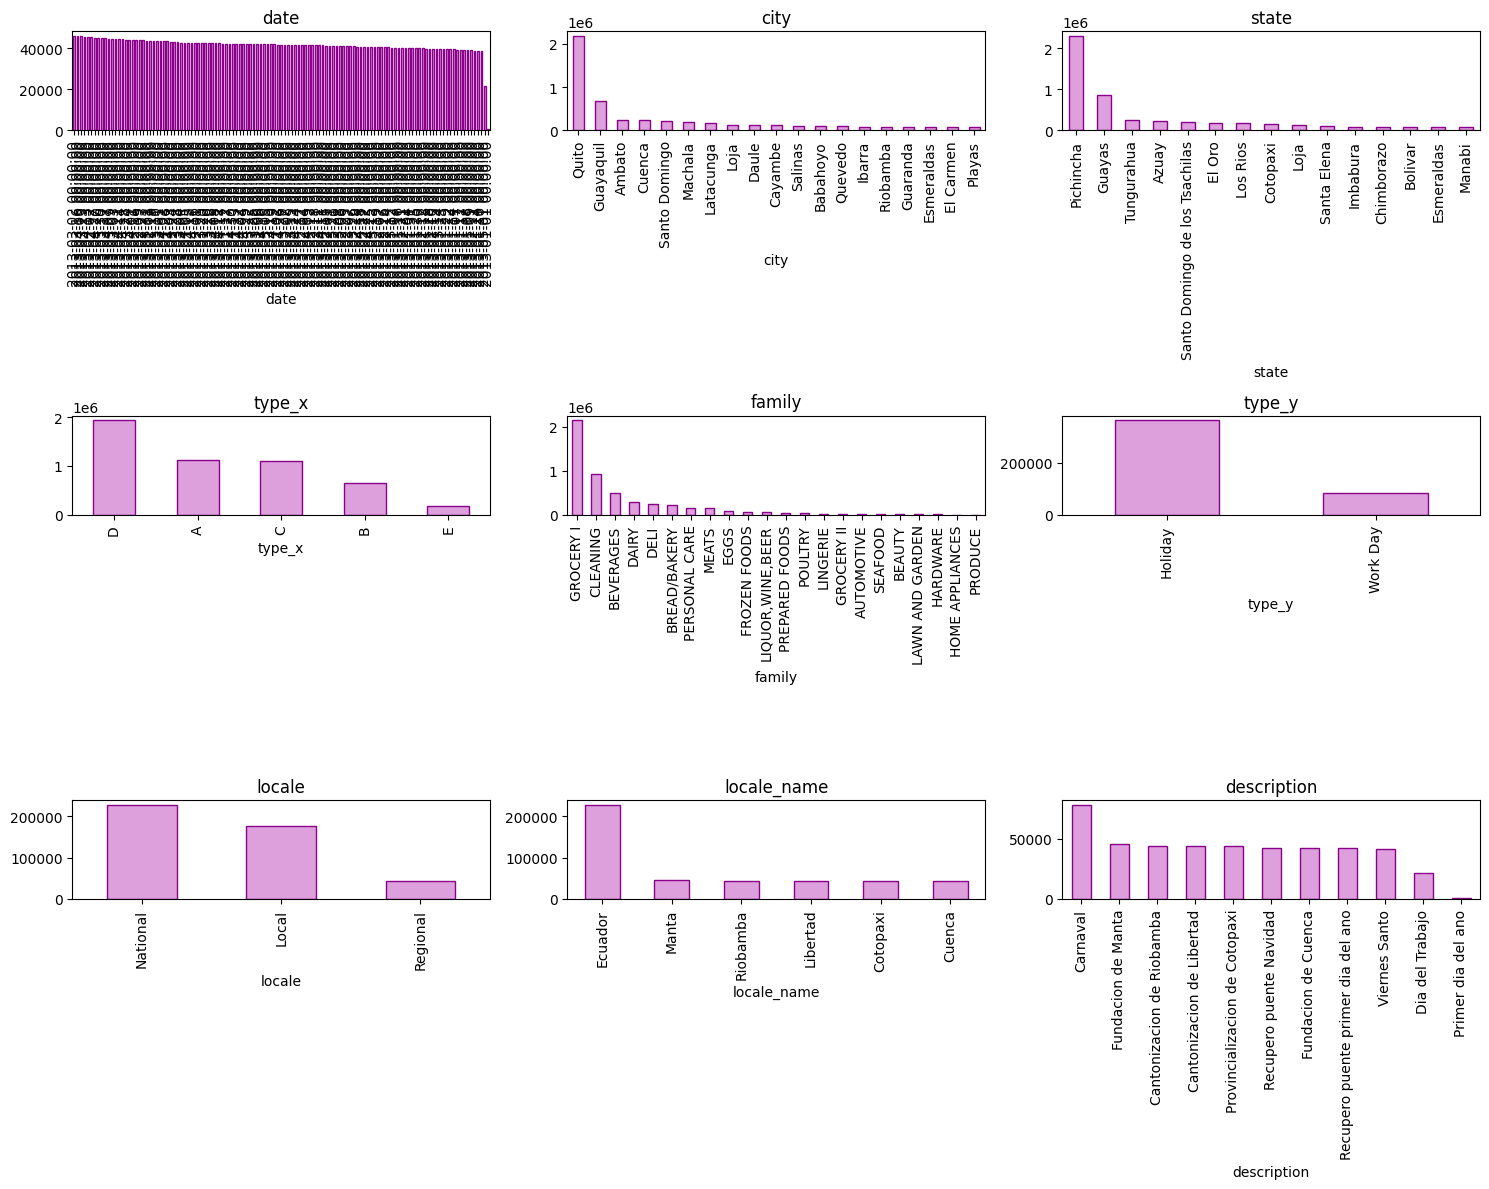

In [ ]:
fig, axes = plt.subplots(nrows=int(np.ceil(len(cat_cols)/3)), ncols=3, figsize=(15, 4 * int(np.ceil(len(cat_cols)/3))))
axes = axes.flatten()

for ax, col in zip(axes, cat_cols):
    df[col].value_counts().plot(kind="bar", ax=ax, color='plum', edgecolor='darkmagenta')
    ax.set_title(col)

for ax in axes[len(cat_cols):]:
    ax.axis("off")

plt.tight_layout()
plt.show()

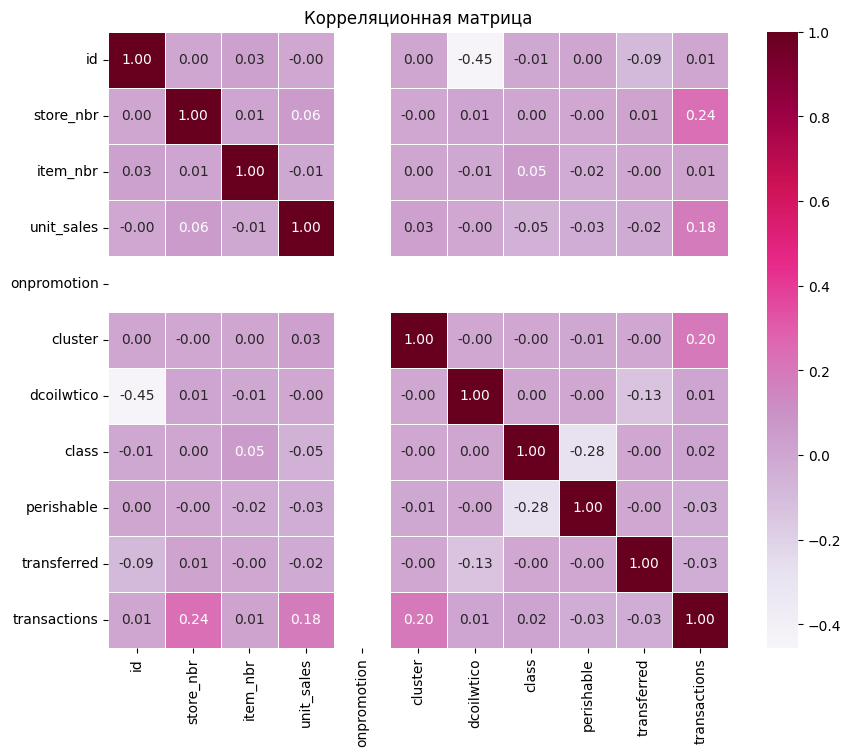

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="PuRd", linewidths=0.5, fmt=".2f")
plt.title("Корреляционная матрица")
plt.show()

Случайная корреляция между ценой на нефть и айди....... также есть корреляция между количеством транзакций и номером и кластером магазина (скорее всего, есть какой-то популярный магазин), и с количеством продаж и количеством транзакций. Но количество транзакций заранее мы не знаем :) а мы хотим именно предсказывать будущее, надо будет с этим работать

Еще есть корреляция между class продукта и perishable. Perishable - то, быстро ли портится продукт, правильные предсказания по нему весили 125%, по остальным продуктам - 100%.

# Baseline


Как метрику модели будем использовать RMSLE. Нам важно, чтобы одинаковые ошибки наказывались меньше для больших чисел - предсказать 5 продаж и получить 55 для нас гораздо хуже, чем предсказать 1050 и получить 1000

Для бейзлайн-модели возьмем lightgbm - быстро обучается и работает с категориальными переменными

Также я хочу на бейзлайне посмотреть, как сильно влияет на качество модели количество строк в датасете

И еще нужно учитывать, что transactions мы не знаем на момент предсказания, на них можно учиться, но взять из датасета мы их не можем. Будем считать, что цену на нефть мы все-таки знаем - ее возможно быстро получить, если надо

Также в train датасете продажи могут быть отрицательными из-за возрватов. Для бейзлайна просто обрежем продажи для нуля, возвраты будем считать выбросами

Предсказывать будем вперед на 2 недели

(ячейка выполняется где-то 3 минуты)

In [ ]:
!pip install lightgbm

Размер датасета: 100000
Конец train 2013-01-04 00:00:00
Дни валидационной выборки: c 2013-01-05 00:00:00 до 2013-01-18 00:00:00
Строк в тренировочной: 100000, валидационной: 561844
Training until validation scores don't improve for 50 rounds
[200]	valid_0's rmse: 18.7361
[400]	valid_0's rmse: 18.6281
Did not meet early stopping. Best iteration is:
[454]	valid_0's rmse: 18.6139
best_iter: 454,  RMSLE = 0.87656
Размер датасета: 500000
Конец train 2013-01-14 00:00:00
Дни валидационной выборки: c 2013-01-15 00:00:00 до 2013-01-28 00:00:00
Строк в тренировочной: 500000, валидационной: 567138
Training until validation scores don't improve for 50 rounds
[200]	valid_0's rmse: 15.9884
[400]	valid_0's rmse: 15.6786
Did not meet early stopping. Best iteration is:
[500]	valid_0's rmse: 15.5805
best_iter: 500,  RMSLE = 0.72164
Размер датасета: 2000000
Конец train 2013-02-19 00:00:00
Дни валидационной выборки: c 2013-02-20 00:00:00 до 2013-03-05 00:00:00
Строк в тренировочной: 2000000, валидационной

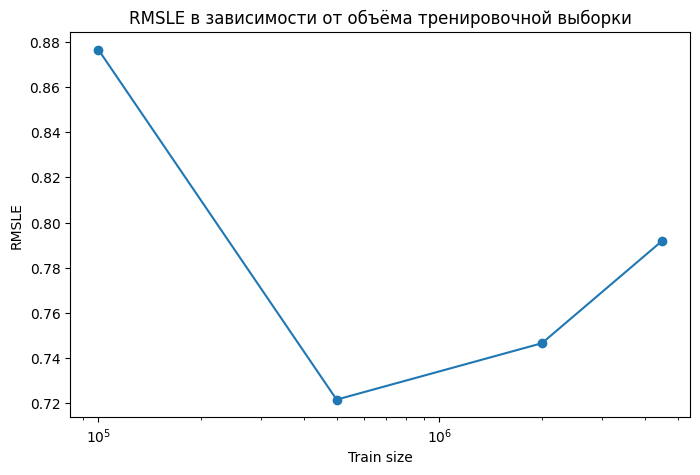

In [ ]:
import lightgbm as lgb
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_log_error

df_enc = df.copy()
df_enc['is_holiday'] = df_enc['type_y'].notna().astype(int)
df_enc['dayofweek'] = df_enc['date'].dt.dayofweek
df_enc['month'] = df_enc['date'].dt.month
df_enc['day'] = df_enc['date'].dt.day

df_enc['unit_sales_raw'] = df_enc['unit_sales']
df_enc['unit_sales'] = df_enc['unit_sales'].clip(lower=0.0)


exclude = {'id', 'date', 'unit_sales', 'unit_sales_raw', 'transactions'}
candidate_cols = ['store_nbr', 'item_nbr', 'onpromotion', 'cluster', 'dcoilwtico',
          'family', 'class', 'perishable', 'is_holiday',
          'dayofweek', 'month', 'day']

label_encoders = {}
for col in df_enc.select_dtypes(include=['object', 'category']).columns:
    if col in exclude:
        continue
    le = LabelEncoder()
    df_enc[col] = le.fit_transform(df_enc[col].astype(str))
    label_encoders[col] = le

df_enc[candidate_cols] = df_enc[candidate_cols].fillna(0)


def rmsle(y_true, y_pred):
    return np.sqrt(mean_squared_log_error(y_true, y_pred))

results = []

df_sorted = df_enc.sort_values('date').reset_index(drop=True)

for train_size in [100_000, 500_000, 2_000_000, 4_500_000]:
    print("Размер датасета:", train_size)
    train_df = df_sorted.iloc[:train_size].copy()

    train_max_date = train_df['date'].max()
    val_start = train_max_date + pd.Timedelta(days=1)
    val_end = train_max_date + pd.Timedelta(days=14) # предсказываем на 14 дней
    valid_df = df_sorted[(df_sorted['date'] >= val_start) & (df_sorted['date'] <= val_end)].copy()

    print("Конец train", train_max_date)
    print(f"Дни валидационной выборки: c {valid_df['date'].min()} до {valid_df['date'].max()}")
    print(f"Строк в тренировочной: {len(train_df)}, валидационной: {len(valid_df)}")

    y_train = train_df['unit_sales'].values
    y_valid = valid_df['unit_sales'].values

    X_train = train_df[candidate_cols]
    X_valid = valid_df[candidate_cols]

    lgb_train = lgb.Dataset(X_train, label=y_train, free_raw_data=False)
    lgb_valid = lgb.Dataset(X_valid, label=y_valid, reference=lgb_train, free_raw_data=False)

    categorical_feats = [c for c in candidate_cols if c in label_encoders.keys()]
    params = {
        'objective': 'regression',
        'metric': 'rmse',
        'verbosity': -1,
        'seed': 42,
        'boosting_type': 'gbdt',
        'num_leaves': 31,
        'learning_rate': 0.1,
        'min_data_in_leaf': 20
    }
    model = lgb.train(
        params,
        lgb_train,
        num_boost_round=500,
        valid_sets=[lgb_valid],
        callbacks=[
        lgb.early_stopping(stopping_rounds=50),
        lgb.log_evaluation(period=200)
        ]
    )

    pred = model.predict(X_valid, num_iteration=model.best_iteration)
    pred = np.clip(pred, 0, None) # убираем отрицательные предсказания
    rmsle_score = rmsle(y_valid, pred)
    print(f"best_iter: {model.best_iteration},  RMSLE = {rmsle_score:.5f}")

    results.append({
        'train_size': train_size,
        'train_rows': len(train_df),
        'valid_rows': len(valid_df),
        'train_max_date': train_max_date,
        'valid_date_range': (valid_df['date'].min(), valid_df['date'].max()),
        'rmsle': float(rmsle_score),
        'best_iter': int(model.best_iteration)
    })

res_df = pd.DataFrame(results)
print(res_df[['train_size', 'train_rows', 'valid_rows', 'rmsle']])


plt.figure(figsize=(8,5))
plt.plot(res_df['train_size'], res_df['rmsle'], marker='o')
plt.xscale('log')
plt.xlabel('Train size')
plt.ylabel('RMSLE')
plt.title('RMSLE в зависимости от объёма тренировочной выборки')
plt.show()



теперь будем предсказывать на неделю вперед:

Размер датасета: 100000
Конец train 2013-01-04 00:00:00
Дни валидационной выборки: c 2013-01-05 00:00:00 до 2013-01-11 00:00:00
Строк в тренировочной: 100000, валидационной: 279487
Training until validation scores don't improve for 50 rounds
[200]	valid_0's rmse: 20.1986
[400]	valid_0's rmse: 20.0614
Did not meet early stopping. Best iteration is:
[495]	valid_0's rmse: 20.0381
best_iter: 495,  RMSLE = 0.86137
Размер датасета: 500000
Конец train 2013-01-14 00:00:00
Дни валидационной выборки: c 2013-01-15 00:00:00 до 2013-01-21 00:00:00
Строк в тренировочной: 500000, валидационной: 284590
Training until validation scores don't improve for 50 rounds
[200]	valid_0's rmse: 15.1736
[400]	valid_0's rmse: 14.8921
Did not meet early stopping. Best iteration is:
[500]	valid_0's rmse: 14.7956
best_iter: 500,  RMSLE = 0.72142
Размер датасета: 2000000
Конец train 2013-02-19 00:00:00
Дни валидационной выборки: c 2013-02-20 00:00:00 до 2013-02-26 00:00:00
Строк в тренировочной: 2000000, валидационной

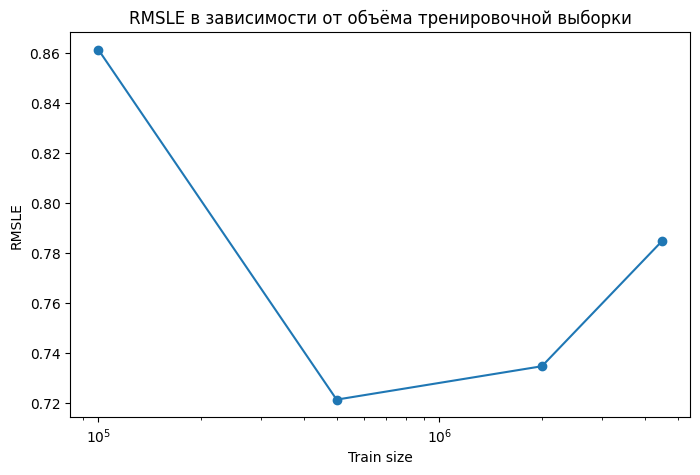

In [ ]:
import lightgbm as lgb
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_log_error

df_enc = df.copy()
df_enc['is_holiday'] = df_enc['type_y'].notna().astype(int)
df_enc['dayofweek'] = df_enc['date'].dt.dayofweek
df_enc['month'] = df_enc['date'].dt.month
df_enc['day'] = df_enc['date'].dt.day

df_enc['unit_sales_raw'] = df_enc['unit_sales']
df_enc['unit_sales'] = df_enc['unit_sales'].clip(lower=0.0)


exclude = {'id', 'date', 'unit_sales', 'unit_sales_raw', 'transactions'}
candidate_cols = ['store_nbr', 'item_nbr', 'onpromotion', 'cluster', 'dcoilwtico',
          'family', 'class', 'perishable', 'is_holiday',
          'dayofweek', 'month', 'day']

label_encoders = {}
for col in df_enc.select_dtypes(include=['object', 'category']).columns:
    if col in exclude:
        continue
    le = LabelEncoder()
    df_enc[col] = le.fit_transform(df_enc[col].astype(str))
    label_encoders[col] = le

df_enc[candidate_cols] = df_enc[candidate_cols].fillna(0)


def rmsle(y_true, y_pred):
    return np.sqrt(mean_squared_log_error(y_true, y_pred))

results = []

df_sorted = df_enc.sort_values('date').reset_index(drop=True)

for train_size in [100_000, 500_000, 2_000_000, 4_500_000]:
    print("Размер датасета:", train_size)
    train_df = df_sorted.iloc[:train_size].copy()

    train_max_date = train_df['date'].max()
    val_start = train_max_date + pd.Timedelta(days=1)
    val_end = train_max_date + pd.Timedelta(days=7) # предсказываем на 7 дней
    valid_df = df_sorted[(df_sorted['date'] >= val_start) & (df_sorted['date'] <= val_end)].copy()

    print("Конец train", train_max_date)
    print(f"Дни валидационной выборки: c {valid_df['date'].min()} до {valid_df['date'].max()}")
    print(f"Строк в тренировочной: {len(train_df)}, валидационной: {len(valid_df)}")

    y_train = train_df['unit_sales'].values
    y_valid = valid_df['unit_sales'].values

    X_train = train_df[candidate_cols]
    X_valid = valid_df[candidate_cols]

    lgb_train = lgb.Dataset(X_train, label=y_train, free_raw_data=False)
    lgb_valid = lgb.Dataset(X_valid, label=y_valid, reference=lgb_train, free_raw_data=False)

    categorical_feats = [c for c in candidate_cols if c in label_encoders.keys()]
    params = {
        'objective': 'regression',
        'metric': 'rmse',
        'verbosity': -1,
        'seed': 42,
        'boosting_type': 'gbdt',
        'num_leaves': 31,
        'learning_rate': 0.1,
        'min_data_in_leaf': 20
    }
    model = lgb.train(
        params,
        lgb_train,
        num_boost_round=500,
        valid_sets=[lgb_valid],
        callbacks=[
        lgb.early_stopping(stopping_rounds=50),
        lgb.log_evaluation(period=200)
        ]
    )

    pred = model.predict(X_valid, num_iteration=model.best_iteration)
    pred = np.clip(pred, 0, None) # убираем отрицательные предсказания
    rmsle_score = rmsle(y_valid, pred)
    print(f"best_iter: {model.best_iteration},  RMSLE = {rmsle_score:.5f}")

    results.append({
        'train_size': train_size,
        'train_rows': len(train_df),
        'valid_rows': len(valid_df),
        'train_max_date': train_max_date,
        'valid_date_range': (valid_df['date'].min(), valid_df['date'].max()),
        'rmsle': float(rmsle_score),
        'best_iter': int(model.best_iteration)
    })

res_df = pd.DataFrame(results)
print(res_df[['train_size', 'train_rows', 'valid_rows', 'rmsle']])


plt.figure(figsize=(8,5))
plt.plot(res_df['train_size'], res_df['rmsle'], marker='o')
plt.xscale('log')
plt.xlabel('Train size')
plt.ylabel('RMSLE')
plt.title('RMSLE в зависимости от объёма тренировочной выборки')
plt.show()



А теперь на месяц

Размер датасета: 100000
Конец train 2013-01-04 00:00:00
Дни валидационной выборки: c 2013-01-05 00:00:00 до 2013-02-03 00:00:00
Строк в тренировочной: 100000, валидационной: 1220707
Training until validation scores don't improve for 50 rounds
[200]	valid_0's rmse: 17.4082
[400]	valid_0's rmse: 17.3008
Did not meet early stopping. Best iteration is:
[454]	valid_0's rmse: 17.2873
best_iter: 454,  RMSLE = 0.87353
Размер датасета: 500000
Конец train 2013-01-14 00:00:00
Дни валидационной выборки: c 2013-01-15 00:00:00 до 2013-02-13 00:00:00
Строк в тренировочной: 500000, валидационной: 1226697
Training until validation scores don't improve for 50 rounds
[200]	valid_0's rmse: 15.6169
[400]	valid_0's rmse: 15.3714
Did not meet early stopping. Best iteration is:
[500]	valid_0's rmse: 15.2954
best_iter: 500,  RMSLE = 0.74199
Размер датасета: 2000000
Конец train 2013-02-19 00:00:00
Дни валидационной выборки: c 2013-02-20 00:00:00 до 2013-03-21 00:00:00
Строк в тренировочной: 2000000, валидационн

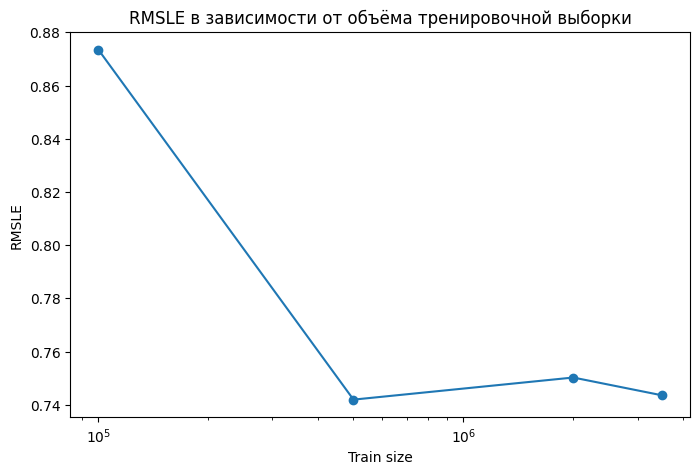

In [ ]:
import lightgbm as lgb
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_log_error

df_enc = df.copy()
df_enc['is_holiday'] = df_enc['type_y'].notna().astype(int)
df_enc['dayofweek'] = df_enc['date'].dt.dayofweek
df_enc['month'] = df_enc['date'].dt.month
df_enc['day'] = df_enc['date'].dt.day

df_enc['unit_sales_raw'] = df_enc['unit_sales']
df_enc['unit_sales'] = df_enc['unit_sales'].clip(lower=0.0)


exclude = {'id', 'date', 'unit_sales', 'unit_sales_raw', 'transactions'}
candidate_cols = ['store_nbr', 'item_nbr', 'onpromotion', 'cluster', 'dcoilwtico',
          'family', 'class', 'perishable', 'is_holiday',
          'dayofweek', 'month', 'day']

label_encoders = {}
for col in df_enc.select_dtypes(include=['object', 'category']).columns:
    if col in exclude:
        continue
    le = LabelEncoder()
    df_enc[col] = le.fit_transform(df_enc[col].astype(str))
    label_encoders[col] = le

df_enc[candidate_cols] = df_enc[candidate_cols].fillna(0)


def rmsle(y_true, y_pred):
    return np.sqrt(mean_squared_log_error(y_true, y_pred))

results = []

df_sorted = df_enc.sort_values('date').reset_index(drop=True)

for train_size in [100_000, 500_000, 2_000_000, 3_500_000]:
    print("Размер датасета:", train_size)
    train_df = df_sorted.iloc[:train_size].copy()

    train_max_date = train_df['date'].max()
    val_start = train_max_date + pd.Timedelta(days=1)
    val_end = train_max_date + pd.Timedelta(days=30) # предсказываем на 30 дней
    valid_df = df_sorted[(df_sorted['date'] >= val_start) & (df_sorted['date'] <= val_end)].copy()

    print("Конец train", train_max_date)
    print(f"Дни валидационной выборки: c {valid_df['date'].min()} до {valid_df['date'].max()}")
    print(f"Строк в тренировочной: {len(train_df)}, валидационной: {len(valid_df)}")

    y_train = train_df['unit_sales'].values
    y_valid = valid_df['unit_sales'].values

    X_train = train_df[candidate_cols]
    X_valid = valid_df[candidate_cols]

    lgb_train = lgb.Dataset(X_train, label=y_train, free_raw_data=False)
    lgb_valid = lgb.Dataset(X_valid, label=y_valid, reference=lgb_train, free_raw_data=False)

    categorical_feats = [c for c in candidate_cols if c in label_encoders.keys()]
    params = {
        'objective': 'regression',
        'metric': 'rmse',
        'verbosity': -1,
        'seed': 42,
        'boosting_type': 'gbdt',
        'num_leaves': 31,
        'learning_rate': 0.1,
        'min_data_in_leaf': 20
    }
    model = lgb.train(
        params,
        lgb_train,
        num_boost_round=500,
        valid_sets=[lgb_valid],
        callbacks=[
        lgb.early_stopping(stopping_rounds=50),
        lgb.log_evaluation(period=200)
        ]
    )

    pred = model.predict(X_valid, num_iteration=model.best_iteration)
    pred = np.clip(pred, 0, None) # убираем отрицательные предсказания
    rmsle_score = rmsle(y_valid, pred)
    print(f"best_iter: {model.best_iteration},  RMSLE = {rmsle_score:.5f}")

    results.append({
        'train_size': train_size,
        'train_rows': len(train_df),
        'valid_rows': len(valid_df),
        'train_max_date': train_max_date,
        'valid_date_range': (valid_df['date'].min(), valid_df['date'].max()),
        'rmsle': float(rmsle_score),
        'best_iter': int(model.best_iteration)
    })

res_df = pd.DataFrame(results)
print(res_df[['train_size', 'train_rows', 'valid_rows', 'rmsle']])


plt.figure(figsize=(8,5))
plt.plot(res_df['train_size'], res_df['rmsle'], marker='o')
plt.xscale('log')
plt.xlabel('Train size')
plt.ylabel('RMSLE')
plt.title('RMSLE в зависимости от объёма тренировочной выборки')
plt.show()



Глобально в поведении RMSLE при увеличении количества дней предсказания ничего не меняется - он заметно хуже на данных около 100 тысяч, потом резко падает на 500, и после остается на примерно одинаковом уровне на миллионах, но при больших данных взлетает опять

На графике на 28 дней при максимальном размере датасета rmsle не взлетел, но возможно это связано с тем, что там было не сильное изменение размера по сравнению с предыдущей моделью - на предсказаниях на 7 и 14 дней самая большая модель использовала 4.5 миллиона данных, на 28 дней - 3.5

Из всего этого можно сделать вывод, что имеет смысл размер данных около 2-3 миллионов.

## Важность признаков

In [ ]:
best_model = model

/tmp/ipython-input-558276561.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=fi_df, x='importance', y='feature', palette='viridis')


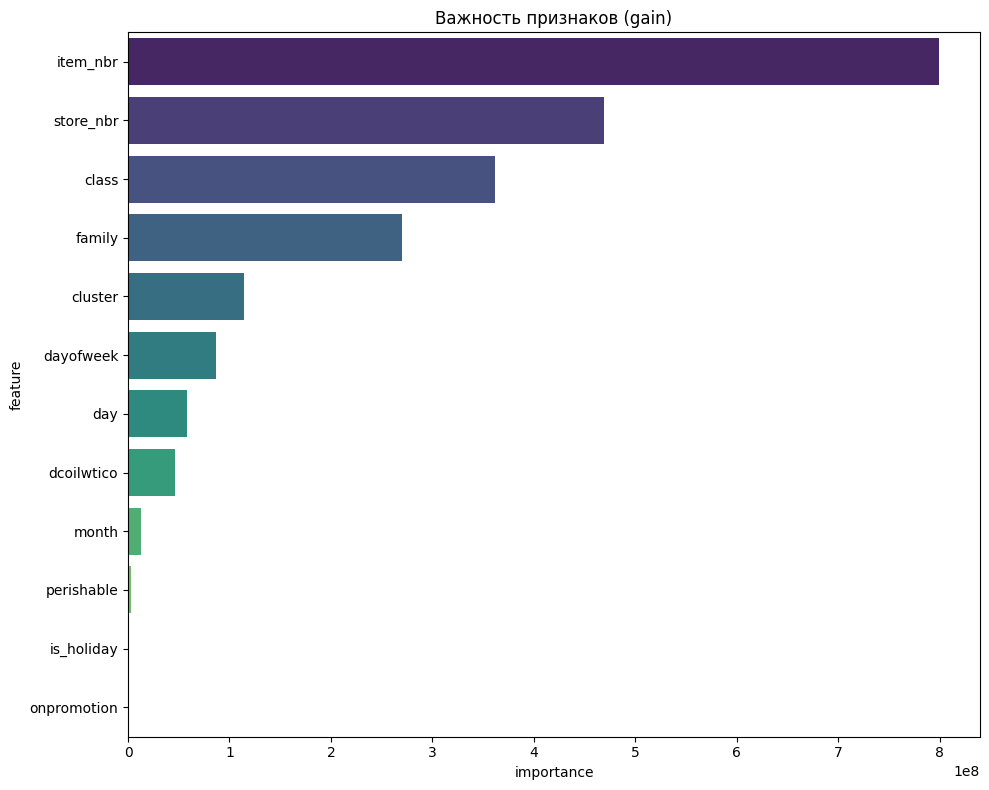

In [ ]:

importance = best_model.feature_importance(importance_type='gain')
feature_names = best_model.feature_name()

fi_df = pd.DataFrame({
    'feature': feature_names,
    'importance': importance
}).sort_values('importance', ascending=False)

plt.figure(figsize=(10, 8))
sns.barplot(data=fi_df, x='importance', y='feature', palette='viridis')
plt.title("Важность признаков (gain)")
plt.tight_layout()
plt.show()

Есть явные победители в важности признаков :)

# Этап 2


# Аномалии и выбросы

### Ищем аномалии

До этого строили ящики с усами, повторим здесь:

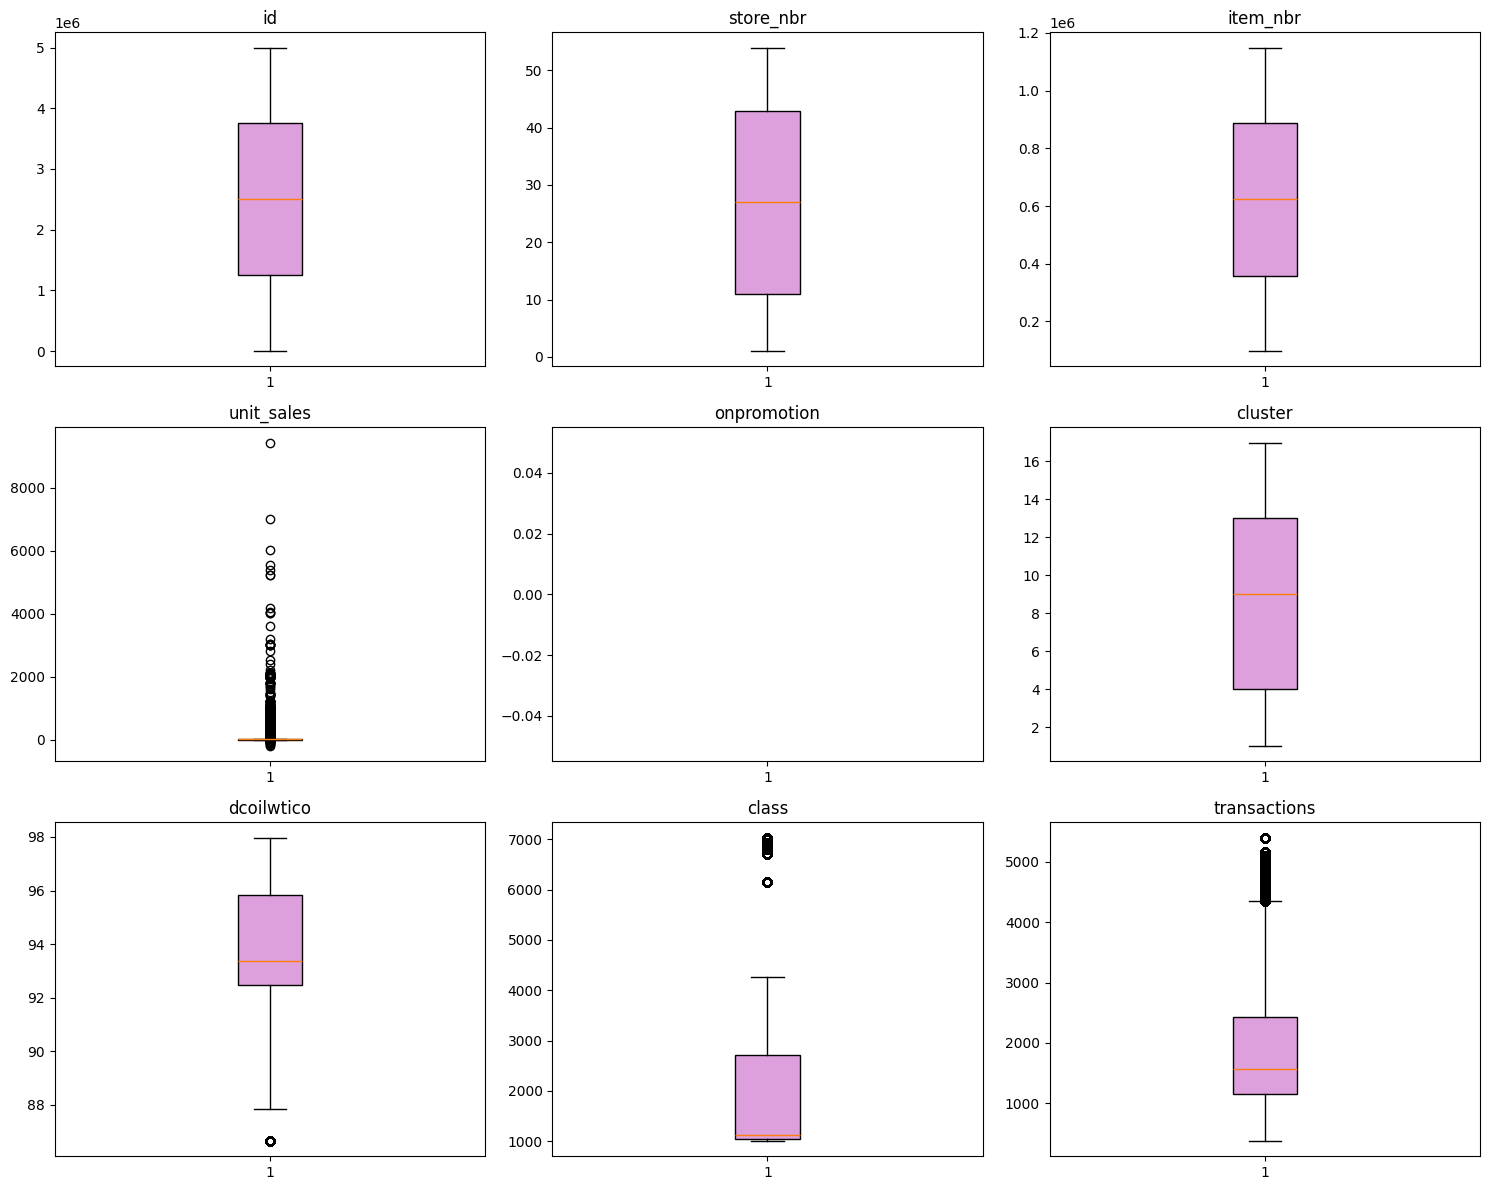

In [ ]:
fig, axes = plt.subplots(nrows=int(np.ceil(len(num_cols)/3)), ncols=3, figsize=(15, 4 * int(np.ceil(len(num_cols)/3))))
axes = axes.flatten()

for ax, col in zip(axes, num_cols):
    ax.boxplot(df[col].dropna(), patch_artist=True, boxprops=dict(facecolor='plum'))
    ax.set_title(col)

for ax in axes[len(num_cols):]:
    ax.axis("off")

plt.tight_layout()
plt.show()

Класс - скорее категориальная переменная, ее лучше обработать по-другому. Но очень много выбросов в таргете, в количестве транзакций за день и есть рекордно низкая цена нефти. Важно посмотреть на цену нефти, т.к. она была в топе признаков модели, а транзакции мы не можем использовать, т.к. заранее мы их не знаем

In [ ]:
def find_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers, lower_bound, upper_bound

outliers_sales, low_sales, high_sales = find_outliers_iqr(df, 'unit_sales')
print(f"Выбросы в unit_sales (IQR): {len(outliers_sales)} ({len(outliers_sales)/len(df)*100:.2f}%)")
print(f"Границы: [{low_sales:.2f}, {high_sales:.2f}]")

Выбросы в unit_sales (IQR): 468015 (9.36%)
Границы: [-8.50, 19.50]


"выбросов" в таргете целая десятая, но вообще это не выбросы а важная информация для модели - некоторые товары продаются больше других. Можно сделать дополнительную колонку для товаров с большими продажами (например, выше верхней границы)

In [ ]:
outliers_sales, low_sales, high_sales = find_outliers_iqr(df, 'dcoilwtico')
print(f"Выбросы в цене нефти (IQR): {len(outliers_sales)} записей ({len(outliers_sales)/len(df)*100:.2f}%)")
print(f"Границы: [{low_sales:.2f}, {high_sales:.2f}]")

Выбросы в цене нефти (IQR): 42227 записей (0.84%)
Границы: [87.39, 100.91]


Выбросов в цене нефти очень мало, большая часть сосредоточена в двух средних квартилях (больше 99%). Такое количество выбросов можно игнорировать (и они даже не слишком сильно выбиваются, всего лишь 86 вместо 87)

In [ ]:
def analyze_categorical_outliers(df, categorical_columns, rare_threshold):
    for col in categorical_columns:
        print(f"\nАнализ столбца: {col}")

        value_counts = df[col].value_counts(dropna=False)
        total_rows = len(df)
        unique_count = len(value_counts)

        print(f"Значений: {unique_count}")
        print(f"Пропусков: {df[col].isna().sum()} ({df[col].isna().sum()/total_rows*100:.2f}%)")

        print(f"Самые частые категории:")
        for i, (val, count) in enumerate(value_counts.head().items()):
            percentage = count / total_rows * 100
            print(f"  {i+1}. {val}: {count} ({percentage:.2f}%)")

        rare_categories = value_counts[value_counts / total_rows < rare_threshold]

        print(f"\nРедкие категории (< {rare_threshold*100:.1f})%:")
        if len(rare_categories) > 0:
            for val, count in rare_categories.head(10).items():
                percentage = count / total_rows * 100
                print(f"  - '{val}': {count} ({percentage:.4f}%)")


cat_cols += ['class']

analysis_results = analyze_categorical_outliers(df, cat_cols, rare_threshold=0.005)


Анализ столбца: date
Значений: 121
Пропусков: 0 (0.00%)
Самые частые категории:
  1. 2013-03-02 00:00:00: 45876 (0.92%)
  2. 2013-03-16 00:00:00: 45811 (0.92%)
  3. 2013-04-06 00:00:00: 45811 (0.92%)
  4. 2013-03-23 00:00:00: 45459 (0.91%)
  5. 2013-04-13 00:00:00: 45279 (0.91%)

Редкие категории (< 0.5)%:
  - '2013-05-01 00:00:00': 21348 (0.4270%)
  - '2013-01-01 00:00:00': 578 (0.0116%)

Анализ столбца: city
Значений: 19
Пропусков: 0 (0.00%)
Самые частые категории:
  1. Quito: 2182614 (43.65%)
  2. Guayaquil: 687156 (13.74%)
  3. Ambato: 246031 (4.92%)
  4. Cuenca: 234722 (4.69%)
  5. Santo Domingo: 211206 (4.22%)

Редкие категории (< 0.5)%:

Анализ столбца: state
Значений: 15
Пропусков: 0 (0.00%)
Самые частые категории:
  1. Pichincha: 2293456 (45.87%)
  2. Guayas: 863942 (17.28%)
  3. Tungurahua: 246031 (4.92%)
  4. Azuay: 234722 (4.69%)
  5. Santo Domingo de los Tsachilas: 211206 (4.22%)

Редкие категории (< 0.5)%:

Анализ столбца: type_x
Значений: 5
Пропусков: 0 (0.00%)
Самые ча

Есть редкие и очень редкие типы family, и также есть относительно редкие значения class. И то и то - классификация товара, посмотрим среднее количество продаж и проверим, принадлежат ли редкие class к редким family

Средние продажи для редких классов:
  Class 2228: среднее 8.14, медиана 5.00
  Class 2130: среднее 8.15, медиана 5.00
  Class 2306: среднее 6.88, медиана 4.20
  Class 1086: среднее 3.68, медиана 3.00
  Class 2102: среднее 11.74, медиана 7.00
  Class 1078: среднее 6.16, медиана 4.00
  Class 2630: среднее 6.05, медиана 4.00
  Class 1056: среднее 4.99, медиана 3.00
  Class 3090: среднее 4.95, медиана 3.00
  Class 2304: среднее 6.43, медиана 4.47
  Class 1080: среднее 25.49, медиана 15.00
  Class 3028: среднее 4.03, медиана 3.00
  Class 2142: среднее 5.49, медиана 4.00
  Class 3030: среднее 3.59, медиана 2.00
  Class 1066: среднее 6.41, медиана 5.00
  Class 2104: среднее 7.81, медиана 6.00
  Class 3040: среднее 4.45, медиана 3.00
  Class 2114: среднее 4.94, медиана 3.00
  Class 1236: среднее 6.76, медиана 4.00
  Class 2220: среднее 5.26, медиана 3.00
  Class 1039: среднее 4.43, медиана 3.00
  Class 2128: среднее 4.68, медиана 3.00
  Class 2986: среднее 10.36, медиана 7.00
  Class 2716: сре

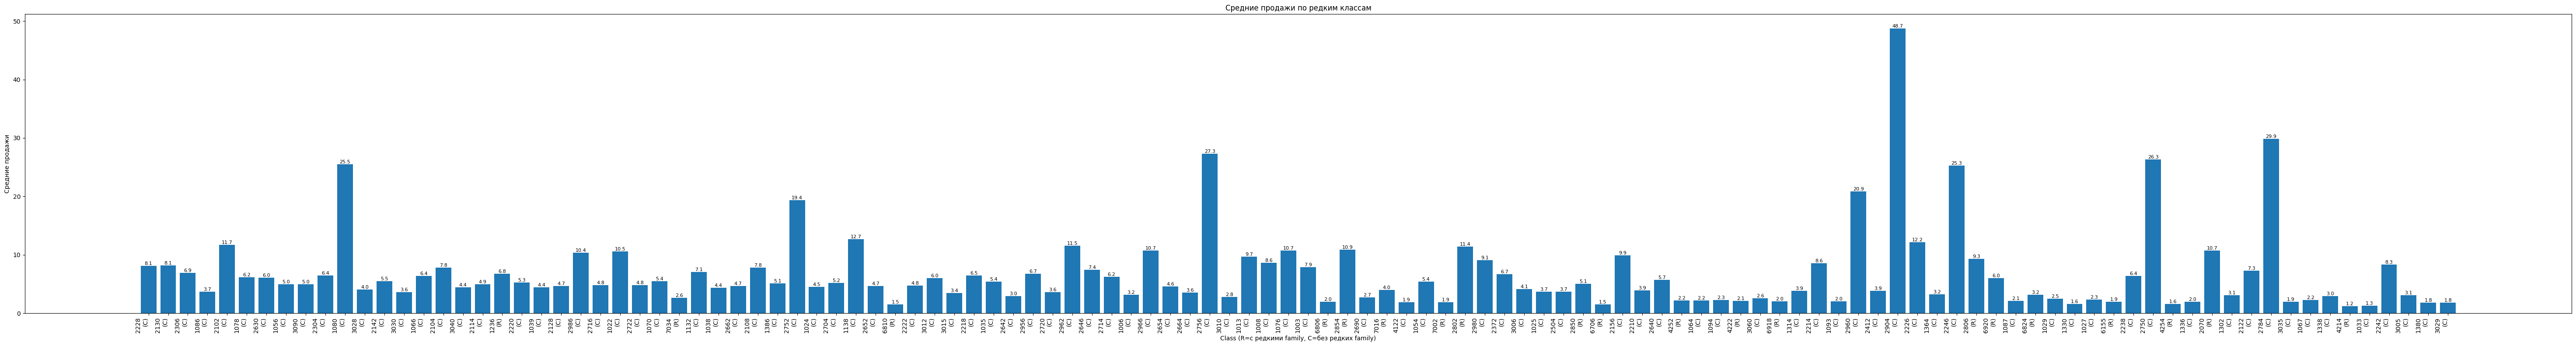

In [ ]:
def analyze_rare_class_family_relationship(df, rare_threshold):
    rare_classes = df['class'].value_counts(normalize=True)
    rare_classes = rare_classes[rare_classes < rare_threshold].index.tolist()

    rare_families = df['family'].value_counts(normalize=True)
    rare_families = rare_families[rare_families < rare_threshold].index.tolist()

    print("Средние продажи для редких классов:")
    for class_val in rare_classes:
        mean_sales = df[df['class'] == class_val]['unit_sales'].mean()
        median_sales = df[df['class'] == class_val]['unit_sales'].median()
        print(f"  Class {class_val}: среднее {mean_sales:.2f}, медиана {median_sales:.2f}")

    print("\nСредние продажи для редких семейств:")
    for family_val in rare_families:
        mean_sales = df[df['family'] == family_val]['unit_sales'].mean()
        median_sales = df[df['family'] == family_val]['unit_sales'].median()
        print(f"  Family '{family_val}': среднее {mean_sales:.2f}, медиана {median_sales:.2f}")

    print("\nПринадлежность редких классов к редким фемили:")

    results = []
    for class_val in rare_classes:
        class_families = df[df['class'] == class_val]['family'].unique()
        has_rare = any(fam in rare_families for fam in class_families)
        mean_sales = df[df['class'] == class_val]['unit_sales'].mean()

        results.append({
            'class': class_val,
            'has_rare_family': has_rare,
            'mean_sales': mean_sales
        })

    results_df = pd.DataFrame(results)

    print(f"Всего редких классов: {len(results_df)}")
    print(f"Из них входят в family: {results_df['has_rare_family'].sum()}")
    mean_with_rare = results_df[results_df['has_rare_family']]['mean_sales'].mean()
    mean_without_rare = results_df[~results_df['has_rare_family']]['mean_sales'].mean()

    print(f"\nСредние продажи:")
    print(f"  С редкими family: {mean_with_rare:.2f}")
    print(f"  Без редких family: {mean_without_rare:.2f}")
    print(f"  Общее среднее: {df['unit_sales'].mean():.2f}")

    plt.figure(figsize=(max(20, len(results_df) * 0.5), 8))

    sales = results_df['mean_sales'].values
    labels = [f"{row['class']}\n({'R' if row['has_rare_family'] else 'C'})"
              for _, row in results_df.iterrows()]

    plt.bar(range(len(sales)), sales)
    plt.xlabel('Class (R=с редкими family, C=без редких family)')
    plt.ylabel('Средние продажи')
    plt.title('Средние продажи по редким классам')
    plt.xticks(range(len(sales)), labels, rotation=90, ha='right')

    for i, value in enumerate(sales):
        plt.text(i, value, f'{value:.1f}', ha='center', va='bottom', fontsize=8)

    plt.tight_layout()
    plt.show()

analyze_rare_class_family_relationship(df, rare_threshold=0.005)

Особой корреляции между редкостью семейства и редкостью класса нет, также и с выручкой. Есть один класс который заметно выше остальных по продажам (около 6 раз), есть также другие с высокими продажами, но их мы отловим на обработке больших продаж. То есть с редкими категориями и семействами нам ничего не надо делать

### Генерация признаков из аномалий

Резюмируя прошлый этап: нам нужна колонка "у этого товара высокие продажи", считать ее будем как 1 если продажи выше третьего квартиля (ниже не рассматриваем т.к. модель не предсказывает отрицательные значения)

Cчитаем эту колонку на train, потом переносим ее в val, группируя по item_nbr

In [ ]:
def add_high_sales_feature_simple(train_df, valid_df):
    #train_df = train_df.copy()
    #valid_df = valid_df.copy()
    q3_train = train_df['unit_sales'].quantile(0.75)
    train_df['high_unit_sales'] = (train_df['unit_sales'] > q3_train).astype(int)

    high_sales_items = train_df[train_df['high_unit_sales'] == 1]['item_nbr'].unique()
    valid_df['high_unit_sales'] = valid_df['item_nbr'].isin(high_sales_items).astype(int)

    return train_df, valid_df

### ML для поиска сложных выбросов

id: 4939 аномалий (4.9%)
store_nbr: 3801 аномалий (3.8%)
item_nbr: 4921 аномалий (4.9%)
unit_sales: 4747 аномалий (4.7%)
onpromotion: 0 аномалий (0.0%)
cluster: 2600 аномалий (2.6%)
dcoilwtico: 4775 аномалий (4.8%)
class: 3776 аномалий (3.8%)
transactions: 4998 аномалий (5.0%)


/tmp/ipython-input-3369474301.py:45: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax1.boxplot([df_with_anomalies[df_with_anomalies[anomaly_col] == 0][feature].dropna(),
/tmp/ipython-input-3369474301.py:45: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax1.boxplot([df_with_anomalies[df_with_anomalies[anomaly_col] == 0][feature].dropna(),
/tmp/ipython-input-3369474301.py:45: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax1.boxplot([df_with_anomalies[df_with_anomalies[anomaly_col] == 0][feature].dropna(),
/tmp/ipython-input-3369474301.py:45: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been ren

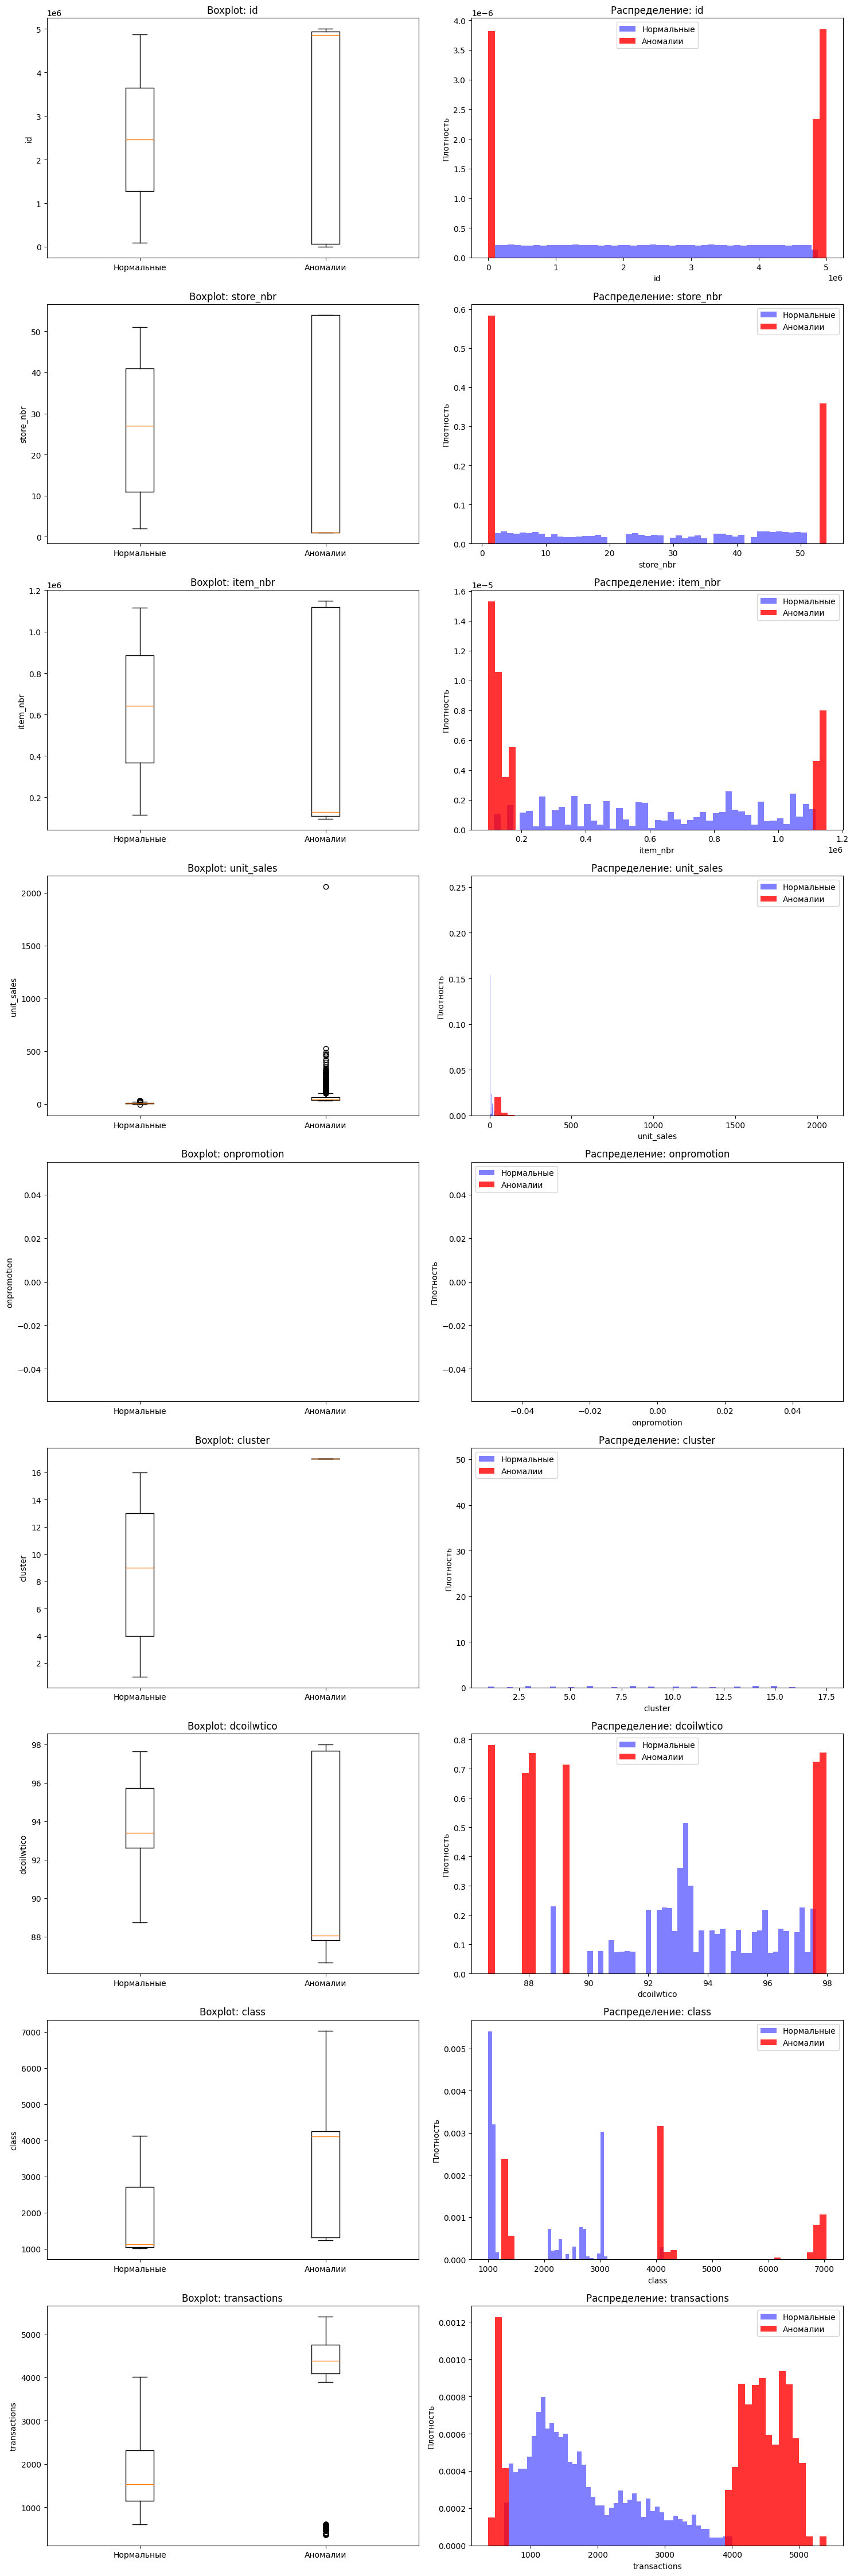

id: 4939 аномалий
store_nbr: 3801 аномалий
item_nbr: 4921 аномалий
unit_sales: 4747 аномалий
onpromotion: 0 аномалий
cluster: 2600 аномалий
dcoilwtico: 4775 аномалий
class: 3776 аномалий
transactions: 4998 аномалий


In [ ]:
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import LabelEncoder, StandardScaler

def detect_anomalies_per_feature(df, features):
    results = {}
    df_sample = df.sample(100000, random_state=42).copy()

    for feature in features:
        X = df_sample[feature].fillna(0).values.reshape(-1, 1)
        scaler = StandardScaler()
        X_scaled = scaler.fit_transform(X)

        iso = IsolationForest(
            n_estimators=50,
            contamination=0.05,
            random_state=42
        )

        predictions = iso.fit_predict(X_scaled)
        df_sample[f'{feature}_anomaly'] = (predictions == -1).astype(int)
        results[feature] = {
            'model': iso,
            'scaler': scaler,
            'anomaly_count': (predictions == -1).sum(),
            'anomaly_percentage': (predictions == -1).mean() * 100
        }

        print(f"{feature}: {results[feature]['anomaly_count']} аномалий ({results[feature]['anomaly_percentage']:.1f}%)")

    return df_sample, results

df_with_anomalies, anomaly_results = detect_anomalies_per_feature(df, features=num_cols)

def visualize_per_feature_anomalies(df_with_anomalies, features):
    n_features = len(features)
    fig, axes = plt.subplots(n_features, 2, figsize=(15, 5*n_features))

    for idx, feature in enumerate(features):
        if feature not in df_with_anomalies.columns:
            continue

        anomaly_col = f'{feature}_anomaly'
        ax1, ax2 = axes[idx, 0], axes[idx, 1]

        ax1.boxplot([df_with_anomalies[df_with_anomalies[anomaly_col] == 0][feature].dropna(),
                     df_with_anomalies[df_with_anomalies[anomaly_col] == 1][feature].dropna()],
                    labels=['Нормальные', 'Аномалии'])
        ax1.set_title(f'Boxplot: {feature}')
        ax1.set_ylabel(feature)

        ax2.hist(df_with_anomalies[df_with_anomalies[anomaly_col] == 0][feature].dropna(),
                 bins=50, alpha=0.5, label='Нормальные', color='blue', density=True)
        ax2.hist(df_with_anomalies[df_with_anomalies[anomaly_col] == 1][feature].dropna(),
                 bins=50, alpha=0.8, label='Аномалии', color='red', density=True)
        ax2.set_title(f'Распределение: {feature}')
        ax2.set_xlabel(feature)
        ax2.set_ylabel('Плотность')
        ax2.legend()

    plt.tight_layout()
    plt.show()

visualize_per_feature_anomalies(df_with_anomalies, num_cols)

for feature in num_cols:
    anomaly_col = f'{feature}_anomaly'
    if anomaly_col in df_with_anomalies.columns:
        print(f"{feature}: {df_with_anomalies[anomaly_col].sum()} аномалий")


В основном содеражельные аномалии в нефти, транзакциях и class. С ними мы уже поработали ранее. Также нашел верхнюю часть unit_sales как аномалии, их мы тоже обработали

date: 100000 аномалий (100.0%), редких категорий: 121
city: 0 аномалий (0.0%), редких категорий: 0
state: 0 аномалий (0.0%), редких категорий: 0
type_x: 0 аномалий (0.0%), редких категорий: 0
family: 4403 аномалий (4.4%), редких категорий: 12
type_y: 0 аномалий (0.0%), редких категорий: 0
locale: 0 аномалий (0.0%), редких категорий: 0
locale_name: 0 аномалий (0.0%), редких категорий: 0
description: 14 аномалий (0.0%), редких категорий: 1
class: 36685 аномалий (36.7%), редких категорий: 143


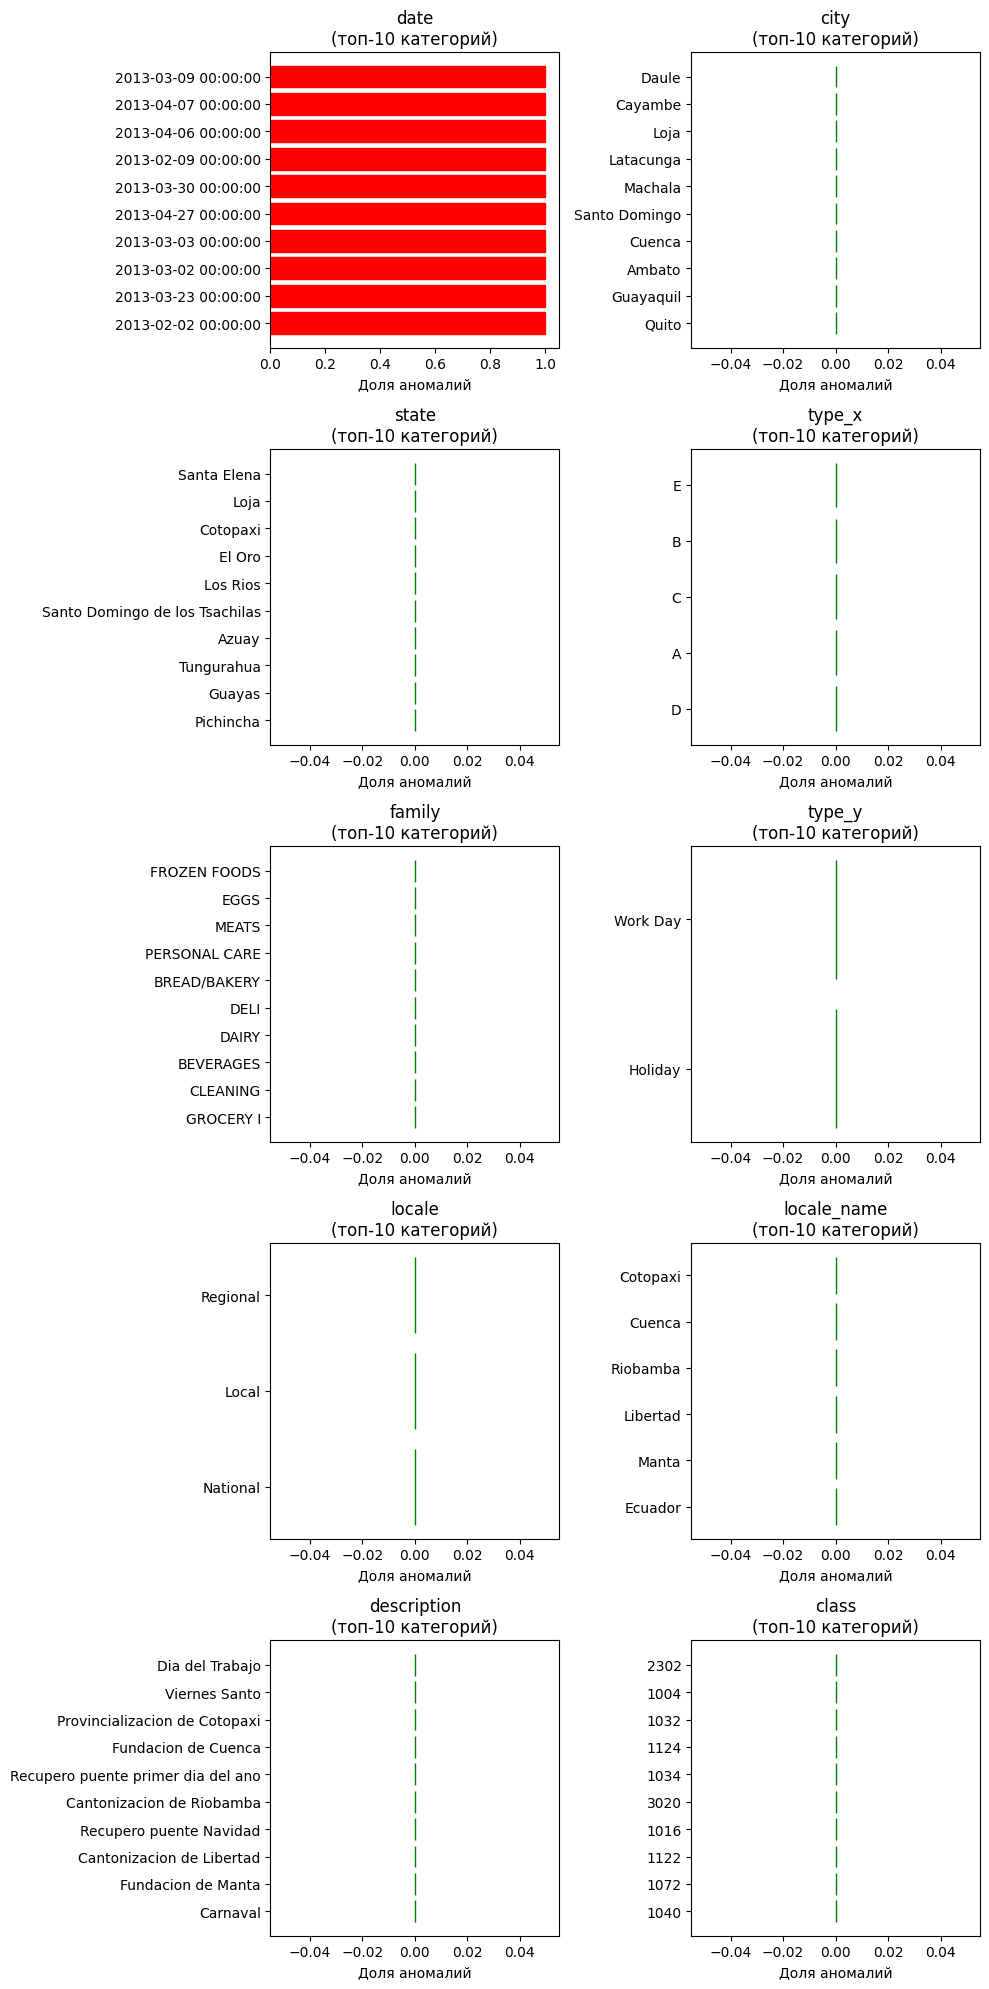

date: 100000 аномалий
city: 0 аномалий
state: 0 аномалий
type_x: 0 аномалий
family: 4403 аномалий
type_y: 0 аномалий
locale: 0 аномалий
locale_name: 0 аномалий
description: 14 аномалий
class: 36685 аномалий


In [ ]:
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import LabelEncoder, StandardScaler

def detect_anomalies_cat(df, features):
    results = {}
    df_sample = df.sample(100000, random_state=42).copy()

    for col in cat_cols:
            freq = df_sample[col].value_counts(normalize=True)
            rare_categories = freq[freq < 0.01].index

            df_sample[f'{col}_anomaly'] = df_sample[col].isin(rare_categories).astype(int)

            anomaly_count = df_sample[f'{col}_anomaly'].sum()
            anomaly_pct = anomaly_count / len(df_sample) * 100

            results[col] = {
                'rare_categories': len(rare_categories),
                'anomaly_count': anomaly_count,
                'anomaly_percentage': anomaly_pct
            }

            print(f"{col}: {anomaly_count} аномалий ({anomaly_pct:.1f}%), "
                  f"редких категорий: {len(rare_categories)}")
    return df_sample, results


df_with_anomalies, anomaly_results = detect_anomalies_cat(df, features=cat_cols)

def visualize_per_feature_cat(df_with_anomalies, cat_cols, top_n=10):

    n_cols = 2
    n_rows = (len(cat_cols) + n_cols - 1) // n_cols

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(5*n_cols, 4*n_rows))

    for idx, col in enumerate(cat_cols[:n_rows*n_cols]):
        row_idx = idx // n_cols
        col_idx = idx % n_cols
        ax = axes[row_idx, col_idx]

        if f'{col}_anomaly' in df_with_anomalies.columns:
            anomaly_stats = df_with_anomalies.groupby(col)[f'{col}_anomaly'].mean()
            top_categories = df_with_anomalies[col].value_counts().head(top_n).index
            plot_data = anomaly_stats.loc[top_categories].sort_values(ascending=True)

            bars = ax.barh(range(len(plot_data)), plot_data.values)
            ax.set_yticks(range(len(plot_data)))
            ax.set_yticklabels(plot_data.index)
            ax.set_xlabel('Доля аномалий')
            ax.set_title(f'{col}\n(топ-{top_n} категорий)')

            for bar, value in zip(bars, plot_data.values):
                if value > 0.5:
                    bar.set_color('red')
                elif value > 0.1:
                    bar.set_color('orange')
                else:
                    bar.set_color('green')
    plt.tight_layout()
    plt.show()

visualize_per_feature_cat(df_with_anomalies, cat_cols)

for feature in cat_cols:
    anomaly_col = f'{feature}_anomaly'
    if anomaly_col in df_with_anomalies.columns:
        print(f"{feature}: {df_with_anomalies[anomaly_col].sum()} аномалий")


В категориях аналогично, аномалии в класс и family, но мы их либо отловили в unit_sales, если они важные, либо они не влияют на продажи и не важные. Ну и случайно все даты аномальные



Итог: ml методы тут не нужны, аномалии можно отловить статистически

In [ ]:
train_df, valid_df = add_high_sales_feature_simple(train_df, valid_df)

# Генерация признаков и отбор переменных

### Обрабатываем категориальные переменные

Самые важные признаки ни за что не должны утечь, поэтому item_nbr и store_nbr надо закодировать

In [ ]:
!pip install category_encoders

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.9/85.9 kB 1.9 MB/s eta 0:00:00


In [ ]:
from category_encoders import TargetEncoder

def target_encode_cols(train_df, valid_df, cols, target='unit_sales'):
    #train_df = train_df.copy()
    #valid_df = valid_df.copy()

    for col in cols:
        te = TargetEncoder(cols=[col])
        te.fit(train_df[[col]], train_df[target])

        train_df[f"{col}_te"] = te.transform(train_df[[col]])
        valid_df[f"{col}_te"] = te.transform(valid_df[[col]])

    return train_df, valid_df


te_cols = ["item_nbr", "store_nbr"]
train_df, valid_df = target_encode_cols(train_df, valid_df, te_cols)

Как кодировать остальные категориальные признаки? Для strong features лучше оставить Target Encoding, обезопасим себя, для type_x, type_y, state, city OneHotEncoding, это база

In [ ]:
# family, class
strong_te_cols = ["family", "class"]
train_df, valid_df = target_encode_cols(train_df, valid_df, strong_te_cols)

In [ ]:
# type_x, type_y, state, city
from sklearn.preprocessing import OneHotEncoder

ohe_cols = ["type_x", "type_y", "state", "city"]

ohe = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

ohe_train = ohe.fit_transform(train_df[ohe_cols])
ohe_valid = ohe.transform(valid_df[ohe_cols])

ohe_feature_names = ohe.get_feature_names_out(ohe_cols)

ohe_train_df = pd.DataFrame(ohe_train, columns=ohe_feature_names, index=train_df.index)
ohe_valid_df = pd.DataFrame(ohe_valid, columns=ohe_feature_names, index=valid_df.index)

train_df = pd.concat([train_df.drop(columns=ohe_cols), ohe_train_df], axis=1)
valid_df = pd.concat([valid_df.drop(columns=ohe_cols), ohe_valid_df], axis=1)

del ohe_train_df
del ohe_valid_df
del model

In [ ]:
from lightgbm import LGBMRegressor
import sklearn.metrics as skm

features = [col for col in train_df.columns if col not in ["unit_sales", "date"]]
target = "unit_sales"

model = LGBMRegressor(n_estimators=100)

model.fit(train_df[features], train_df[target])
preds = model.predict(valid_df[features])

rmse = np.sqrt(skm.mean_squared_error(valid_df[target], preds))
mae = skm.mean_absolute_error(valid_df[target], preds)
r2 = skm.r2_score(valid_df[target], preds)

print("Метрики:")
print(f"RMSE: {rmse}")
print(f"MAE: {mae}")
print(f"R^2: {r2}")

Метрики:
RMSE: 7.016141585666044
MAE: 0.044231797149044405
R^2: 0.8764445685646771


### Признаки, основанные на ближайших соседях

Координат нет. Выкручиваемся...

Товары похожих категорий (class, family) и магазины похожего кластера ведут себя одинаково по продажам, поэтому они будут нам полезны.

In [ ]:
# средние продажи похожих категорий товаров
train_df['similar_items_mean_sales'] = train_df.groupby(['family', 'class'])['unit_sales'].transform('mean')
valid_df = valid_df.merge(
    train_df.groupby(['family', 'class'])['unit_sales'].mean().rename("similar_items_mean_sales"),
    on=['family', 'class'],
    how='left'
)

In [ ]:
# средние продажи магазинов одного кластера
train_df['cluster_mean_sales'] = train_df.groupby('cluster')['unit_sales'].transform('mean')

valid_df = valid_df.merge(
    train_df.groupby('cluster')['unit_sales'].mean().rename("cluster_mean_sales"),
    on='cluster',
    how='left'
)

### Временные признаки уже сделаны в EDA

### Контекстные признаки, отражающие специфику задачи

Так как мы прогнозируем продажи, стоит исследовать несколько гипотез:
1. Сезонные пики (далее смотрю именно декабрьские, но код можно поменять и сделать признаки для каждого месяца)
2. Дни до зарплаты, т.к. "новые деньги" всегда дают мотивацию купить что-то классное, новое и полезное

In [ ]:
# добавим колонку с месяцем, форматируем из даты
df['date'] = pd.to_datetime(df['date'])
df['month'] = df['date'].dt.month
df.head()

,id,date,store_nbr,item_nbr,unit_sales,onpromotion,city,state,type_x,cluster,...,family,class,perishable,type_y,locale,locale_name,description,transferred,transactions,month
0,0,2013-01-01,25,103665,7.0,NaN,Salinas,Santa Elena,D,1,...,BREAD/BAKERY,2712,False,Holiday,National,Ecuador,Primer dia del ano,False,770,1
1,1,2013-01-01,25,105574,1.0,NaN,Salinas,Santa Elena,D,1,...,GROCERY I,1045,True,Holiday,National,Ecuador,Primer dia del ano,False,770,1
2,2,2013-01-01,25,105575,2.0,NaN,Salinas,Santa Elena,D,1,...,GROCERY I,1045,True,Holiday,National,Ecuador,Primer dia del ano,False,770,1
3,3,2013-01-01,25,108079,1.0,NaN,Salinas,Santa Elena,D,1,...,GROCERY I,1030,True,Holiday,National,Ecuador,Primer dia del ano,False,770,1
4,4,2013-01-01,25,108701,1.0,NaN,Salinas,Santa Elena,D,1,...,DELI,2644,False,Holiday,National,Ecuador,Primer dia del ano,False,770,1


In [ ]:
# 1
df['is_december'] = (df['month'] == 12).astype(int)

In [ ]:
# 2
def days_to_payday(d):
    day = d.day
    if day <= 15:
        return 15 - day
    else:
        return 30 - day if day < 30 else 0

df['days_to_payday'] = df['date'].apply(days_to_payday)

### Отбор признаков

In [ ]:
# через фильтры — корреляции, χ², ANOVA;
num_cols = train_df.select_dtypes(include=[np.number]).columns

corr = train_df[num_cols].corr()['unit_sales'].sort_values(ascending=False)
print(corr.head(15))

In [ ]:
# через обёртки — Optuna, RFECV, полный перебор;#
from sklearn.feature_selection import RFECV
from lightgbm import LGBMRegressor

X = train_df.drop(columns=['unit_sales', 'date']) # из-за даты ничего не работает, но у нас осталась числовая колонка с месяцем, всё норм
y = train_df['unit_sales']

model = LGBMRegressor()
rfecv = RFECV(model, cv=3, step=15)
rfecv.fit(X, y)

selected_features = X.columns[rfecv.support_]
print(selected_features)

In [ ]:
# через встроенные методы — L1-регуляризация, feature importances из деревьев/бустингов.
model = LGBMRegressor()
model.fit(X, y)

importances = pd.DataFrame({
    "feature": X.columns,
    "importance": model.feature_importances_
}).sort_values("importance", ascending=False)

print(importances.head(20))

# Этап 3

### Интерпретация моделей

### LIME и SHAP - глобальные интерпретации

Проверяем пропуски

In [ ]:
missing = train_df.isna().sum().sort_values(ascending=False)
print("Пропуски в train_df:")
print(missing[missing > 0])

In [ ]:
num_cols = df.select_dtypes(include=['int64', 'float64', 'int32']).columns.tolist()
df_filled = df.copy()
df_filled[num_cols] = df_filled[num_cols].fillna(df_filled[num_cols].median())

cat_cols = df.select_dtypes(include=['object']).columns.tolist()
for col in cat_cols:
    df_filled[col] = df_filled[col].fillna(df_filled[col].mode()[0])

Всё хорошо

In [ ]:
!pip install lime

In [ ]:
# LIME

from sklearn.linear_model import LinearRegression
import lime
import lime.lime_tabular

features = [c for c in train_df.columns if c not in ['unit_sales', 'date']]
X_train = train_df[features]
y_train = train_df['unit_sales']

lin_model = LinearRegression()
lin_model.fit(X_train, y_train)

lime_explainer = lime.lime_tabular.LimeTabularExplainer(
    training_data=np.array(X_train),
    feature_names=features,
    verbose=True,
    mode='regression'
)

lime_importance = {}

for i in np.random.choice(len(X_train), 100, replace=False):
    exp = lime_explainer.explain_instance(X_train.iloc[i].values, lin_model.predict)
    for feat, val in exp.as_list():
        lime_importance[feat] = lime_importance.get(feat, 0) + abs(val)

print("Глобальная LIME важность:")
for k, v in sorted(lime_importance.items(), key=lambda x: -x[1])[:15]:
    print(k, v)

In [ ]:
!pip install shap

Эта ячейка у меня делалась 18 минут

In [ ]:
# SHAP

import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
import shap

# только числовые
num_cols_lin = df.select_dtypes(include=['int64', 'Int64', 'int32', 'float64', 'Float64']).columns.tolist()
num_cols_lin.remove('unit_sales')

imputer = SimpleImputer(strategy='median')

X_lin = imputer.fit_transform(df[num_cols_lin].astype(float))
y_lin = df['unit_sales'].astype(float)

lin_model = LinearRegression()
lin_model.fit(X_lin, y_lin)

explainer_lin = shap.LinearExplainer(lin_model, X_lin)
shap_values_lin = explainer_lin.shap_values(X_lin)
shap.summary_plot(shap_values_lin, X_lin, feature_names=num_cols_lin)

explainer_lgb = shap.TreeExplainer(model)
shap_values_lgb = explainer_lgb.shap_values(X_train)

shap.summary_plot(shap_values_lgb, X_train, max_display=15)

### Сравнение признаков

In [ ]:
shap_mean_lin = np.abs(shap_values_lin).mean(axis=0)
shap_mean_lgb = np.abs(shap_values_lgb).mean(axis=0)

linear_features = ['id', 'store_nbr', 'item_nbr', 'onpromotion', 'cluster', 'dcoilwtico', 'class', 'transactions', 'month', 'is_december']

top_lin = pd.Series(shap_mean_lin, index=linear_features).sort_values(ascending=False)
top_lgb = pd.Series(shap_mean_lgb, index=features).sort_values(ascending=False).head(15)

print("Топ 10 SHAP признаков (линейный случай):")
print(top_lin)

print("\nТоп 15 SHAP признаков (лгб случай):")
print(top_lgb)

print("\nСовпадение признаков:")
print(set(top_lin.index) & set(top_lgb.index))

### Локальные интерпретации

In [ ]:
sample_idx = 67

instance_lin = X_lin[sample_idx].reshape(1, -1)
instance_lgb = X_train.iloc[sample_idx].values.reshape(1, -1)

print("локальная интерпретация для наблюдения", sample_idx)
print(f"истинное значение продаж: {y_lin[sample_idx]:.2f}")
print(f"предсказание линейной модели: {lin_model.predict(instance_lin)[0]:.2f}")
print(f"предсказание лгб: {model.predict(instance_lgb)[0]:.2f}")

lime_explainer_lin = lime.lime_tabular.LimeTabularExplainer(
    training_data=X_lin,
    feature_names=linear_features,
    verbose=False,
    mode='regression',
    random_state=42
)

exp_linear = lime_explainer_lin.explain_instance(
    data_row=X_lin[sample_idx],
    predict_fn=lambda x: lin_model.predict(x),
    num_features=10
)

print("\nLIME (Linear)")
exp_linear.show_in_notebook()

lime_explainer_lgb = lime.lime_tabular.LimeTabularExplainer(
    training_data=X_train.values,
    feature_names=features,
    verbose=False,
    mode='regression',
    random_state=42
)

exp_lgb = lime_explainer_lgb.explain_instance(
    data_row=X_train.iloc[sample_idx].values,
    predict_fn=model.predict,
    num_features=10
)

print("\nLIME (LGBM)")
exp_lgb.show_in_notebook()

print("\nSHAP (Linear)")
shap.force_plot(
    explainer_lin.expected_value,
    shap_values_lin[sample_idx],
    instance_lin[0],
    feature_names=linear_features,
    matplotlib=True
)
plt.show()

print("\nSHAP (LGBM)")
shap.force_plot(
    explainer_lgb.expected_value,
    shap_values_lgb[sample_idx],
    instance_lgb[0],
    feature_names=features,
    matplotlib=True
)
plt.show()



In [ ]:
lime_features_linear = dict(exp_linear.as_list())
lime_features_lgb = dict(exp_lgb.as_list())

shap_dict_linear = dict(zip(linear_features, shap_values_lin[sample_idx]))
shap_dict_lgb = dict(zip(features, shap_values_lgb[sample_idx]))

common_features = sorted(set(linear_features) & set(features))
comparison_data = []

for feature in common_features:
    comparison_data.append({
        'Feature': feature,
        'LIME_lin': lime_features_linear.get(feature, 0),
        'LIME_lgb': lime_features_lgb.get(feature, 0),
        'SHAP_lin': shap_dict_linear.get(feature, 0),
        'SHAP_lgb': shap_dict_lgb.get(feature, 0)
    })

comparison_df = pd.DataFrame(comparison_data)

print(comparison_df.reindex(comparison_df['SHAP_lgb'].abs().sort_values(ascending=False).index).head(10))

Это последнее, что мне удалось запустить, после этого колаб закончился :<

## SHAP-эмбеддинги и анализ сдвигов

In [ ]:
from scipy.spatial.distance import mahalanobis
from scipy.stats import chi2

def get_shap_embeddings(model, X, model_type='tree'):

    if model_type == 'tree':
        explainer = shap.TreeExplainer(model)
    elif model_type == 'linear':
        explainer = shap.LinearExplainer(model, X)

    shap_values = explainer.shap_values(X)
    return np.array(shap_values), explainer.expected_value


def detect_shifts_with_shap(shap_embeddings, threshold=2.0):
    mean_shap = np.mean(shap_embeddings, axis=0)
    cov_matrix = np.cov(shap_embeddings.T)

    try:
        inv_cov_matrix = np.linalg.pinv(cov_matrix)
    except:
        inv_cov_matrix = np.linalg.pinv(cov_matrix + np.eye(cov_matrix.shape[0]) * 1e-6)

    distances = []
    for i in range(len(shap_embeddings)):
        diff = shap_embeddings[i] - mean_shap
        dist = np.sqrt(np.dot(np.dot(diff, inv_cov_matrix), diff))
        distances.append(dist)

    distances = np.array(distances)

    threshold_value = np.percentile(distances, 100 - threshold)
    anomalies = distances > threshold_value

    return distances, anomalies, threshold_value


In [ ]:
shap_embeddings, expected_value = get_shap_embeddings(model, X_train.values, 'tree')

print("\n=== Обнаружение сдвигов с помощью SHAP-эмбеддингов ===")

distances, anomalies, threshold_value = detect_shifts_with_shap(shap_embeddings, threshold=1.0)

print(f"Обнаружено {anomalies.sum()} аномальных наблюдений ({anomalies.sum()/len(anomalies)*100:.2f}%)")
print(f"Пороговое значение расстояния: {threshold_value:.4f}")

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(distances, bins=50, alpha=0.7, color='blue', edgecolor='black')
plt.axvline(threshold_value, color='red', linestyle='--',
            label=f'Порог аномалий: {threshold_value:.4f}')
plt.xlabel('Расстояние Махаланобиса')
plt.ylabel('Частота')
plt.title('Распределение расстояний для обнаружения аномалий')
plt.legend()
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.ensemble import RandomForestRegressor

X_clean = X_lin[~anomalies]
y_clean = y_lin[~anomalies]

print(f"\nРазмер данных до очистки: {len(X_lin)}")
print(f"Размер данных после очистки: {len(X_clean)}")

rf_model_clean = RandomForestRegressor(n_estimators=50, max_depth=10, random_state=42, n_jobs=-1)
rf_model_clean.fit(X_clean, y_clean)

X_train, X_test, y_train, y_test = train_test_split(X_lin, y_lin, test_size=0.2, random_state=42)

rf_model_original = RandomForestRegressor(n_estimators=50, max_depth=10, random_state=42, n_jobs=-1)
rf_model_original.fit(X_train, y_train)

y_pred_original = rf_model_original.predict(X_test)
y_pred_clean = rf_model_clean.predict(X_test)

metrics_original = {
    'RMSE': np.sqrt(mean_squared_error(y_test, y_pred_original)),
    'MAE': mean_absolute_error(y_test, y_pred_original),
    'R2': r2_score(y_test, y_pred_original)
}

metrics_clean = {
    'RMSE': np.sqrt(mean_squared_error(y_test, y_pred_clean)),
    'MAE': mean_absolute_error(y_test, y_pred_clean),
    'R2': r2_score(y_test, y_pred_clean)
}

print("\n=== Сравнение метрик до и после очистки ===")
metrics_df = pd.DataFrame({
    'Метрика': ['RMSE', 'MAE', 'R2'],
    'Исходные данные': [metrics_original['RMSE'], metrics_original['MAE'], metrics_original['R2']],
    'Очищенные данные': [metrics_clean['RMSE'], metrics_clean['MAE'], metrics_clean['R2']]
})

print(metrics_df)

In [ ]:
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap
import warnings


warnings.filterwarnings('ignore')

if len(shap_embeddings.shape) == 3:
    shap_embeddings = shap_embeddings.mean(axis=1)

pca = PCA(n_components=2, random_state=42)
shap_pca = pca.fit_transform(shap_embeddings)

tsne = TSNE(n_components=2, random_state=42, perplexity=30)
shap_tsne = tsne.fit_transform(shap_embeddings)

clustering_methods = {
    'KMeans (k=3)': KMeans(n_clusters=3, random_state=42),
    'KMeans (k=5)': KMeans(n_clusters=5, random_state=42),
    'DBSCAN': DBSCAN(eps=0.5, min_samples=5),
    'Agglomerative (3 clusters)': AgglomerativeClustering(n_clusters=3)
}

fig, axes = plt.subplots(2, 4, figsize=(20, 10))

for idx, (name, model) in enumerate(clustering_methods.items()):
    row = idx // 2
    col = idx % 2

    clusters = model.fit_predict(shap_embeddings)

    ax1 = axes[row, col*2]
    ax1.scatter(shap_pca[:, 0], shap_pca[:, 1],
                c=clusters, cmap='tab10', alpha=0.6)
    ax1.set_title(f'{name} (PCA)')

    ax2 = axes[row, col*2 + 1]
    ax2.scatter(shap_tsne[:, 0], shap_tsne[:, 1],
                c=clusters, cmap='tab10', alpha=0.6)
    ax2.set_title(f'{name} (t-SNE)')

plt.tight_layout()
plt.show()

In [ ]:
if len(shap_embeddings.shape) == 3:
    shap_embeddings = shap_embeddings.mean(axis=1)

kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(shap_embeddings)

if len(clusters) != len(X_lin_imputed):
    raise ValueError("Длина кластеров не совпадает с X_lin_imputed")

X_with_clusters = np.hstack([X_lin_imputed, clusters.reshape(-1, 1)])

new_feature_names = list(num_features) + ['shap_cluster']

print("\n=== Интерпретация кластеров ===")
cluster_stats = pd.DataFrame()

for cluster_id in range(3):
    cluster_mask = clusters == cluster_id
    cluster_data = X_lin_imputed[cluster_mask]

    print(f"\nКластер {cluster_id}: {cluster_mask.sum()} наблюдений")

    for i, feature in enumerate(num_features):
        mean_val = cluster_data[:, i].mean()
        std_val = cluster_data[:, i].std()
        print(f"  {feature}: {mean_val:.2f} ± {std_val:.2f}")

X_train_cl, X_test_cl, y_train_cl, y_test_cl = train_test_split(
    X_with_clusters, y_lin, test_size=0.2, random_state=42
)

rf_model_with_clusters = RandomForestRegressor(
    n_estimators=50,
    max_depth=10,
    random_state=42,
    n_jobs=-1
)

rf_model_with_clusters.fit(X_train_cl, y_train_cl)

y_pred_with_clusters = rf_model_with_clusters.predict(X_test_cl)

metrics_with_clusters = {
    'RMSE': np.sqrt(mean_squared_error(y_test_cl, y_pred_with_clusters)),
    'MAE': mean_absolute_error(y_test_cl, y_pred_with_clusters),
    'R2': r2_score(y_test_cl, y_pred_with_clusters)
}

print("\n=== Сравнение с кластерами и без ===")
comparison_clusters = pd.DataFrame({
    'Метрика': ['RMSE', 'MAE', 'R2'],
    'Без кластеров': [metrics_original['RMSE'], metrics_original['MAE'], metrics_original['R2']],
    'С кластерами': [metrics_with_clusters['RMSE'], metrics_with_clusters['MAE'], metrics_with_clusters['R2']]
})

print(comparison_clusters)

improvement = ((metrics_with_clusters['R2'] - metrics_original['R2']) / metrics_original['R2']) * 100
print(f"\nИзменение R²: {improvement:.2f}%")

Тут нужна интерпретация, но для этого нужно запустить код :<

## Кросс-валидация с SHAP-эмбеддингами

In [ ]:
from sklearn.model_selection import KFold
from sklearn.metrics import pairwise_distances

def get_shap_for_model(model, X):
    explainer = shap.TreeExplainer(model)
    shap_vals = explainer.shap_values(X)
    shap_vals = np.array(shap_vals)
    if shap_vals.ndim == 3:
        shap_vals = shap_vals.mean(axis=1)
    return shap_vals, explainer

def detect_shifts_with_shap(shap_embeddings, threshold_percentile=99.0):
    mean_shap = np.mean(shap_embeddings, axis=0)
    cov_matrix = np.cov(shap_embeddings.T)
    inv_cov_matrix = np.linalg.pinv(cov_matrix + np.eye(cov_matrix.shape[0]) * 1e-6)
    distances = np.array([np.sqrt(np.dot(np.dot((s - mean_shap), inv_cov_matrix), (s - mean_shap))) for s in shap_embeddings])
    threshold_value = np.percentile(distances, threshold_percentile)
    anomalies = distances > threshold_value
    return distances, anomalies, threshold_value

n_splits = 5
random_state = 42
max_shap_samples = 2000
meta_model_params = {'n_estimators': 100, 'max_depth': 8, 'random_state': random_state, 'n_jobs': -1}
base_model_params = {'n_estimators': 100, 'max_depth': 8, 'random_state': random_state, 'n_jobs': -1}

try:
    X_all = np.asarray(X_lin_imputed)
    y_all = np.asarray(y_lin)
except NameError as e:
    raise RuntimeError("Нужны X_lin_imputed и y_lin в окружении.") from e

try:
    feature_names = list(features)
except NameError:
    feature_names = [f'f{i}' for i in range(X_all.shape[1])]

print("Размер исходных данных:", X_all.shape)

kf = KFold(n_splits=n_splits, shuffle=True, random_state=random_state)
results = {'fold': [], 'rmse_emb': [], 'r2_emb': [], 'rmse_concat': [], 'r2_concat': []}

for fold_idx, (train_idx, val_idx) in enumerate(kf.split(X_all), start=1):
    print(f"\n--- Fold {fold_idx}/{n_splits} ---")
    X_train, X_val = X_all[train_idx], X_all[val_idx]
    y_train, y_val = y_all[train_idx], y_all[val_idx]

    base_model = RandomForestRegressor(**base_model_params)
    base_model.fit(X_train, y_train)

    shap_train, _ = get_shap_for_model(base_model, X_train)
    shap_val, _ = get_shap_for_model(base_model, X_val)

    X_meta_train_emb = shap_train
    X_meta_val_emb = shap_val
    X_meta_train_concat = np.hstack([X_train, shap_train])
    X_meta_val_concat = np.hstack([X_val, shap_val])

    scaler_emb = StandardScaler().fit(X_meta_train_emb)
    X_meta_train_emb_s = scaler_emb.transform(X_meta_train_emb)
    X_meta_val_emb_s = scaler_emb.transform(X_meta_val_emb)

    scaler_concat = StandardScaler().fit(X_meta_train_concat)
    X_meta_train_concat_s = scaler_concat.transform(X_meta_train_concat)
    X_meta_val_concat_s = scaler_concat.transform(X_meta_val_concat)

    meta_emb = RandomForestRegressor(**meta_model_params)
    meta_emb.fit(X_meta_train_emb_s, y_train)
    pred_emb = meta_emb.predict(X_meta_val_emb_s)

    meta_concat = RandomForestRegressor(**meta_model_params)
    meta_concat.fit(X_meta_train_concat_s, y_train)
    pred_concat = meta_concat.predict(X_meta_val_concat_s)

    rmse_emb = np.sqrt(mean_squared_error(y_val, pred_emb))
    r2_emb = r2_score(y_val, pred_emb)
    rmse_concat = np.sqrt(mean_squared_error(y_val, pred_concat))
    r2_concat = r2_score(y_val, pred_concat)

    print(f"Meta on SHAP:   RMSE={rmse_emb:.4f}, R2={r2_emb:.4f}")
    print(f"Meta on CONCAT: RMSE={rmse_concat:.4f}, R2={r2_concat:.4f}")

    results['fold'].append(fold_idx)
    results['rmse_emb'].append(rmse_emb)
    results['r2_emb'].append(r2_emb)
    results['rmse_concat'].append(rmse_concat)
    results['r2_concat'].append(r2_concat)

res_df = pd.DataFrame(results)
print("\n=== CV Summary ===")
print(res_df)
print("\nСредние показатели:")
print("SHAP-only   RMSE, R2:", res_df['rmse_emb'].mean(), res_df['r2_emb'].mean())
print("CONCAT (X+SHAP) RMSE, R2:", res_df['rmse_concat'].mean(), res_df['r2_concat'].mean())

In [ ]:
base_full = RandomForestRegressor(**base_model_params)
base_full.fit(X_all, y_all)

n_total = X_all.shape[0]
sample_idx = np.random.RandomState(random_state).choice(n_total, size=min(max_shap_samples, n_total), replace=False)
X_sample = X_all[sample_idx]

expl_full = shap.TreeExplainer(base_full)
print("Вычисляем SHAP interaction values (может занять время)...")
si = expl_full.shap_interaction_values(X_sample)
si = np.array(si)
if si.ndim == 3:
    interaction_matrix = np.mean(np.abs(si), axis=0)
elif si.ndim == 4:
    interaction_matrix = np.mean(np.abs(si).mean(axis=1), axis=0)
else:
    raise RuntimeError("Неожиданная форма shap interaction values: " + str(si.shape))

## Граф взаимосвязей признаков

In [ ]:
th = np.percentile(interaction_matrix.flatten(), 90)
plt.figure(figsize=(12,9))
for i in range(interaction_matrix.shape[0]):
    for j in range(interaction_matrix.shape[1]):
        if i == j:
            continue
        val = interaction_matrix[i,j]
        if val >= th:
            plt.arrow(i, j, 0.5*(i-j)*0, 0.5*(j-i)*0, alpha=0.5, head_width=0.1*val, head_length=0.1*val, color='red')
plt.xticks(range(len(feature_names)), feature_names, rotation=90)
plt.yticks(range(len(feature_names)), feature_names)
plt.title("Shapley interaction graph (top interactions)")
plt.xlabel("Feature i")
plt.ylabel("Feature j")
plt.grid(True, linestyle='--', alpha=0.3)
plt.show()

In [ ]:
symm = (interaction_matrix + interaction_matrix.T) / 2.0
n_feat_clusters = min(6, symm.shape[0])
agg = AgglomerativeClustering(n_clusters=n_feat_clusters, affinity='precomputed', linkage='average')
dists = pairwise_distances(symm, metric='euclidean')
feat_labels = agg.fit_predict(dists)
feat_cluster_df = pd.DataFrame({'feature': feature_names, 'cluster': feat_labels}).sort_values('cluster')
print("\nFeature clusters (from SHAP interactions):")
print(feat_cluster_df)

In [ ]:
print("\n=== KMeans на SHAP-эмбеддингах (subsample) ===")
shap_emb_full, _ = get_shap_for_model(base_full, X_all)
idx_sample2 = np.random.RandomState(random_state).choice(X_all.shape[0], size=min(2000, X_all.shape[0]), replace=False)
shap_emb_sub = shap_emb_full[idx_sample2]
kmeans = KMeans(n_clusters=3, random_state=random_state)
clusters_shap = kmeans.fit_predict(shap_emb_sub)

distances_all, anomalies_all, thresh = detect_shifts_with_shap(shap_emb_full, threshold_percentile=99.0)
print(f"\nSHAP distances: threshold={thresh:.4f}, anomalies found: {anomalies_all.sum()} / {len(anomalies_all)}")

plt.figure(figsize=(8,5))
plt.scatter(shap_emb_sub[:,0], shap_emb_sub[:,1] if shap_emb_sub.shape[1]>1 else np.arange(len(shap_emb_sub)),
            c=clusters_shap, cmap='tab10', alpha=0.6)
plt.title("KMeans on SHAP embeddings (subsample)")
plt.xlabel("SHAP dim 0")
plt.ylabel("SHAP dim 1 (or index if 1D)")
plt.show()